<a href="https://colab.research.google.com/github/sergiolitwiniuk85/machineLearning/blob/main/svm_clasification_bagging_stacking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Punto 1: Análisis y Depuración de la Base de Datos y Feature Engineering

El primer paso antes de abordar cualquier problema de machine learning es comprender la naturaleza de los datos, el problema que se plantea y preparar los datos de forma acorde al planteo. Esto significa que debemos realizar un análisis descriptivo para identificar patrones, posibles problemas, valores missing y outliers, para llevar a cabo el feature engineering, que consiste en transformar las variables existentes o crear nuevas variables a partir de las originales que nos permitan mejorar el rendimiento de los modelos predictivos.

## Análisis Descriptivo Inicial:

En primer lugar comenzamos cargando la base de datos datos_tarea25.csv utilizando la librería pandas. Nos planteamos como primer paso obtener los siguientes descriptivos utilizando los siguientes métodos:

* Visualización de las primeras filas del DataFrame para entender la estructura de los datos con el metodo **.head()**.

* Obtención de información general sobre el DataFrame, como el tipo de datos de cada columna y la presencia de valores no nulos utilizando el mètodo **.info()**.

* Eliminacion de registros duplicados.

* Cálculo de estadísticos descriptivos para las variables numéricas como media, desviación estándar, cuartiles. para ello utilizaremos el mètodo **.describe()**.

* Análisis de la distribución de las variables categóricas según conteo de valores únicos con **.value_counts()**.

* Variable Objetivo: la variable objetivo debe construirse a partir de la columna 'Color' para predecir si un coche debe pintarse de blanco o no.

* Valores missing, identificacion y caracterizacion.

## Preprocesamiento:

El preprocesamiento y el feature engineering son cruciales para analizar la calidad de los datos. En el mundo real los datos generalmente de forma frecuente se presentan incompletos con ruido e inconsistentes. Las técnicas de preprocesamiento nos ayudan a limpiar y mejorar la calidad de los datos.
En machine learning dependiendo del algoritmo utilizado deberemos asegurarnos de que nuestro set de datos cumpla con los requisitos para cada algoritmo, por ejemplo los àrboles de decisión son capaces de manejar datos missing, en tanto que el algoritmo SVM no puede ser utilizado con valores nulos, admàs las variables categòricas codificadas en el dataset deben recodificarse como valores numèricas para ser soportados por SVM. Es por ello que teniendo en cuanta que utilizaremos en primer lugar SVM debemos tener presente la necesidad de convertir todos los valores a numèricos ya sea utilizando un encoder o convirtiendo los valores a variables dummies, ademàs debemos asegurarnos de no tener valores nulos. Como una condiciòn mas es cierto que la relación de los outliers y el uso de SVM con kerlen lineal tiene menos impacto que en otros modelos como regresión lineal, aunque con la utilizaciòn de un kernel como rbf que usa distancias exponenciales puede distorsionar significativamente el hiperplano de decisión. Finalmente para reforzar el preprocesamiento debemos tener en cuenta que SVM es sensible al escalado de características, sobre todo cuando se recurre a kernels no lineales, por lo que utilizaremos algun scaler como RobustScaler o MinMaxScaler para los valores numèricos.
En principio no crearemos nuevas variables, nos limitaremos a las ya existentes en el dataset. Esta decisión la he tomado debido a que si bien sería posible introducir nuevas variables lo que se persigue con el desarrollo del módulo es la práctica en las herramientas de anállisis de datos en machine learning y no encontrar el mejor modelo para producción, que si podría merecer el esfuerzo en el desarrollo más amplio del espacio de nuevas variables.
Al final de la etapa de preprocesamiento verificaremos la colinealidad entre las variables para interpretar si es necesaria una reducción de la dimensionalidad, ya que puede ser necesario reducir la cantidad de variables, lo que podrìa mejorar la eficiencia computacional y prevenir el sobreajuste.

### Datos de entrada:

El archivo datos_tarea25  contiene informaciòn de miles de vehìculos, su color y datos relacionados como tamaño del motor, numero de cilindros, kilometraje, etc.

En primer lugar importamos las librerias que utilizaremos mas adelante y cargaremos los datos del **datos_tarea25.xlsx** en un DataFrame llamado **df**.

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.feature_selection import SelectKBest, chi2, RFE, mutual_info_classif, f_classif
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, RocCurveDisplay

from sklearn.model_selection import KFold, ShuffleSplit, LeaveOneOut, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
!pip install openpyxl & pip install missingno

## 1. Introducción (1 página)

  **Problema:**
  

  Una empresa dedicada a la venta de coches usados debe determinar el color óptimo para repintar vehículos que llegan en condiciones deficientes.
  Tras evaluar las opciones, decide limitarse a los colores blanco y negro, La base de datos disponible incluye las siguientes variables independientes Precio de venta, Cantidad de Impuestos a pagar, Fabricante, Año de fabricación, Categoría, Interior de cuero, Tipo de combustible, Volumen del motor, Kilometraje, Cilindros, Tipo de caja de cambios, Ruedas motrices, Lugar del volante, Número de Airbags Y de la variable dependiente Color. La decisión final es si el coche debe pintarse de blanco o no.
  
  **Objetivo del análisis:**

  El objetivo es desarrollar un modelo predictivo que, basándose en las características de los vehículos en el mercado de segunda mano, determine el color optimo a repintar (blanco o negro).


In [ ]:
!pwd

/content


# 3. Análisis Exploratorio y Feature Engineering (4-5 páginas)

**Descripción del Dataset:**

* Visualización de las primeras filas del DataFrame para entender la estructura de los datos con el metodo **.head()**.


In [ ]:
import pandas as pd

df = pd.read_excel('datos_tarea25.xlsx')  # Usar read_excel

# Muestro información básica del dataset
print("="*80)
print("HEAD DEL DATASET")
print("="*80)
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}\n")
print(df.head())
print("\n"*2)
print("="*80)
print("INFORMACIÓN BÁSICA DEL DATASET dtypes")
print("="*80)
print(df.info())


HEAD DEL DATASET
Filas: 4340, Columnas: 15

   Price  Levy   Manufacturer  Prod. year   Category Leather interior  \
0  39493   891        HYUNDAI        2016       Jeep              Yes   
1   1803   761         TOYOTA        2010  Hatchback              Yes   
2   1098   394         TOYOTA        2014      Sedan              Yes   
3    941  1053  MERCEDES-BENZ        2014      Sedan              Yes   
4   1019  1055          LEXUS        2013       Jeep              Yes   

  Fuel type Engine volume    Mileage  Cylinders Gear box type Drive wheels  \
0    Diesel             2  160931 km          4     Automatic        Front   
1    Hybrid           1.8  258909 km          4     Automatic        Front   
2    Hybrid           2.5  398069 km          4     Automatic        Front   
3    Diesel           3.5  184467 km          6     Automatic         Rear   
4    Hybrid           3.5  138038 km          6     Automatic        Front   

        Wheel  Color  Airbags  
0  Left wheel  W

En primer lugar elimino las filas duplicadas del dataset. Esto ademas de ser una practica habitual para evitar introducir sesgos en el entrenamiento de la SVM, evita costos computacionales y tambien evita inestabilidades en los calculos de los kernels, por lo que procedemos a ver de forma simple como se distribuyen los duplicados y luego a removerlos por comppleto.

Registros, Columnas
(4340, 15)


<Axes: xlabel='None', ylabel='count'>

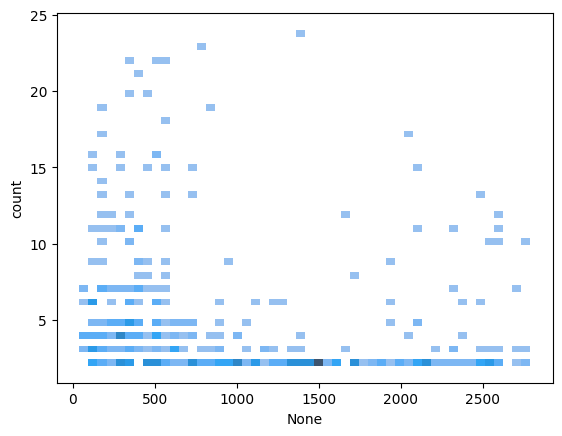

In [ ]:
print("Registros, Columnas")
print(df.shape)

# conteo de duplicados por grupo
dup_counts = df.groupby(df.columns.tolist()).size().reset_index(name='count')
dup_counts = dup_counts[dup_counts['count'] > 1]  # filtro solo duplicados

sns.histplot(data=dup_counts, x=dup_counts.index, y=dup_counts['count'],kde=True, bins=50)


In [ ]:
dup_counts = df.groupby(df.columns.tolist()).size().reset_index(name='count')
dup_counts = dup_counts[dup_counts['count'] > 1]  # filtro solo duplicados
ndups = len(dup_counts)
print("="*80)
print(f"Grupos duplicados: {ndups}")
print("="*80)

Grupos duplicados: 396


In [ ]:
df.drop_duplicates(inplace=True)
print("="*80)
print("LUEGO DE FILTRAR:")
print("="*80)
print("(Filas, Columnas)")
print(df.shape)


LUEGO DE FILTRAR:
(Filas, Columnas)
(2806, 15)


Luego de quitar los duplicados de nuestro DataFrame ahora tenemos 2806 registros. Procedemos a chequear que tan balanceados estan los datos en la variable objetivo, por si es necesario introducir alguna tecnica para evitar el desbalance de la variable target.

In [ ]:
df.groupby('Color').size()

,0
Color,
Black,1438
White,1368


Las proporciones de datos en la variable objetivo se encuentran equilibradas, por lo que no hace falta hacer algun ajuste para balancear la variable targeet, por lo que proseguimos con la preparacion del dataset.

### Realizamos un describe para interpretar mejor el dataset:

* Cálculo de estadísticos descriptivos para las variables numéricas como media, desviación estándar, cuartiles. para ello utilizaremos el mètodo **.describe()**.


In [ ]:
df.describe(include='all')

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
count,2806.000000,2806,2806,2806.000000,2806,2806,2806,2806,2806,2806.000000,2806,2806,2806,2806,2806.000000
unique,NaN,203,4,NaN,3,2,3,58,1826,NaN,2,3,2,2,NaN
top,NaN,-,HYUNDAI,NaN,Sedan,Yes,Petrol,2,0 km,NaN,Automatic,Front,Left wheel,Black,NaN
freq,NaN,634,1038,NaN,1478,2259,1558,558,77,NaN,2168,2010,2710,1438,NaN
mean,23913.585531,NaN,NaN,2012.811475,NaN,NaN,NaN,NaN,NaN,4.646472,NaN,NaN,NaN,NaN,7.536707
std,26028.717701,NaN,NaN,3.926385,NaN,NaN,NaN,NaN,NaN,1.281613,NaN,NaN,NaN,NaN,4.208459
min,3.000000,NaN,NaN,1943.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000
25%,9408.000000,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,4.000000
50%,18821.500000,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,8.000000
75%,31361.000000,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,12.000000


Podemos ver que las variable Levy, como EngineVolume y Mileage se tendran que convertir a numericas para poder ser evaluadas.

Realizamos en primer lugar la conversion de tipos sobre las variables numericas que fueron leidas como object. Ademas una inspeccion sobre el dataset para identificar valores nulos, los cuales deben ser manejados propiamente.

In [ ]:
# Convertir ambas columnas a tipo string primero
df['Engine volume'] = df['Engine volume'].astype(str)
df['Levy'] = df['Levy'].astype(str)

# 1. Procesamiento de 'Engine volume' (Turbo y valor numérico)
df['Turbo'] = df['Engine volume'].str.contains('Turbo', case=True).astype(bool)
df['Engine volume'] = (
    df['Engine volume']
    .str.replace('Turbo', '', case=False)
    .str.strip()
    .replace('', np.nan)
    .astype(float)
)

# 2. Procesamiento de 'Levy' (manejo de valores no numéricos como '-')
df['Levy'] = (
    df['Levy']
    .replace('-', np.nan)  # Reemplazar '-' con NaN
    .astype(float)         # Convertir a float
)

# Convertimos Mileage a valor numerico.
df['Mileage'] = (
    df['Mileage']
    .str.replace(' km', '', regex=False)
    .str.replace(' ', '', regex=False)
    .astype(int)
)


In [ ]:
# Verificación
print(df.head())
print(df.info())
print(df.describe(include='all'))



   Price    Levy   Manufacturer  Prod. year   Category Leather interior  \
0  39493   891.0        HYUNDAI        2016       Jeep              Yes   
1   1803   761.0         TOYOTA        2010  Hatchback              Yes   
2   1098   394.0         TOYOTA        2014      Sedan              Yes   
3    941  1053.0  MERCEDES-BENZ        2014      Sedan              Yes   
4   1019  1055.0          LEXUS        2013       Jeep              Yes   

  Fuel type  Engine volume  Mileage  Cylinders Gear box type Drive wheels  \
0    Diesel            2.0   160931          4     Automatic        Front   
1    Hybrid            1.8   258909          4     Automatic        Front   
2    Hybrid            2.5   398069          4     Automatic        Front   
3    Diesel            3.5   184467          6     Automatic         Rear   
4    Hybrid            3.5   138038          6     Automatic        Front   

        Wheel  Color  Airbags  Turbo  
0  Left wheel  White        4  False  
1  Left 

In [ ]:
df.describe(include='all')

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo
count,2806.000000,2172.000000,2806,2806.000000,2806,2806,2806,2806.000000,2.806000e+03,2806.000000,2806,2806,2806,2806,2806.000000,2806
unique,NaN,NaN,4,NaN,3,2,3,NaN,NaN,NaN,2,3,2,2,NaN,2
top,NaN,NaN,HYUNDAI,NaN,Sedan,Yes,Petrol,NaN,NaN,NaN,Automatic,Front,Left wheel,Black,NaN,False
freq,NaN,NaN,1038,NaN,1478,2259,1558,NaN,NaN,NaN,2168,2010,2710,1438,NaN,2628
mean,23913.585531,900.429558,NaN,2012.811475,NaN,NaN,NaN,2.379651,5.217066e+05,4.646472,NaN,NaN,NaN,NaN,7.536707,NaN
std,26028.717701,505.682390,NaN,3.926385,NaN,NaN,NaN,0.902089,2.097346e+07,1.281613,NaN,NaN,NaN,NaN,4.208459,NaN
min,3.000000,87.000000,NaN,1943.000000,NaN,NaN,NaN,0.000000,0.000000e+00,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN
25%,9408.000000,639.000000,NaN,2011.000000,NaN,NaN,NaN,1.800000,6.292075e+04,4.000000,NaN,NaN,NaN,NaN,4.000000,NaN
50%,18821.500000,781.000000,NaN,2013.000000,NaN,NaN,NaN,2.000000,1.136000e+05,4.000000,NaN,NaN,NaN,NaN,8.000000,NaN
75%,31361.000000,1053.000000,NaN,2015.000000,NaN,NaN,NaN,2.500000,1.651665e+05,4.000000,NaN,NaN,NaN,NaN,12.000000,NaN


En primer lugar vemos valores extremos en la variable precio "Price" con una gran variabilidad y un amplio rango, por lo que debera ser escalada utilizando técnicas como el RobustScaler, que es menos sensible a los outliers.

El impuesto "Levy" presenta tanto valores faltantes como outliers significativos, podria ser imputado utilizando para ello la mediana o un KNNImputer y transformado usando un escalado logarítmico o el RobustScaler.

El volumen del motor "Engine Volume" presenta valores imposibles, como lo son el cero "0"  que deberan ser eliminados.

Respecto a las variables categóricas, la distribución de fabricantes las codificaremos de forma ordinal utilizando OneHotEncoding. Como tambien lo haremos con la variable "Fuel type" Eléctrico < Gasolina < Diésel, ya que conveniente utilizar una codificación ordinal que preserve esta jerarquía y facilite su interpretación por parte del modelo.

En el caso del kilometraje ("Mileage"), donde se observa un valor de más de mil millones de kilómetros, es imprescindible establecer un limite para los registros imposibles, estableciendo un umbral razonable maximo, como 500 mil kilómetros.

Asimismo, para el año de producción ("Prod. year"), intentarè crear categorías agrupadas por lustros (5 años) para reducir la dispersión y mejorar la capacidad del modelo de generalizar patrones temporales de forma más eficiente.


A continuaciòn definimos algunos criterios lògicos para filtrar los valores numéricos del conjunto de datos inicial:, como lo son quitar los autos que tienen kilometraje 0 km, en realidad he considerado que un auto usado tiene al menos 500km de uso, o también filtrar los que presentan mas de 400mil kilometros, o por ejemplo valores de volumen de motor con valor 0, no sabemos con certeza porque estos datos estarían incluidos en el conjunto de datos, aunque estimo sin tener acceso al cliente que esos valores no se condicen con los intereses de una empresa que vende autos usados, es por eso que tengo esos criterios en cuenta para tomar esas decisiones.

Además vemos que el feature precio tiene un valor muy amplio, igual que el kilometraje, por lo tanto tendran que ser escalados utilizando algun escalador suministrado por sklearn como MinMaxScaler o RobustScaler.

* Price (Precio)

  Rango muy amplio: 3a3a627,220

  Desviación estándar alta: 23,990

* Levy (Impuesto)

  Rango: 87 a 11,714

  Desviación estándar: 505.68

* Mileage (Kilometraje)

  Rango extremo: 0 a 1,111,111,109 km (necesita limpieza previa)

  Desviación estándar enorme: 2.097e+07

* Engine volume (Volumen del motor)
f
  Rango: 0 (imposible a menos que fuesen electricos) hasta 6.3 litros

  Vemos que los vehiculos cuyo valor en engine volume es cero pertenecen a categorias de combustible derivado del petroleo o hibridos, por lo que esos datos son erroneos, tenemos que analizar nuevamente que hacemos con esos valores cero, o si tiene sentido imputarlos, o si directamente los eliminamos del dataset para crear nuestro modelo.

  En tanto las variables categóricas Manufacturer, Category, Fuel Type, Gear box Type, DriveWheels, Wheel, Color presentan valores cualitativos que pueden ser manejados con una conversiòn tanto con labelencoder como con onehotencoder.
  En mi caso prefiero la utilizacion de labelencoder para la feature Manufacturer y category, ya que pretendo generar una transformación que tome en cuenta el producto del valor del encoding de la marca y la categoria para relacionar con otras variables para obtener alguna nueva caracteristica que me permita obtener un modelo con un mayor accuracy.
  

A continuación vemos las variables categoricas se distribuyen con respecto a la variable objetivo, lo que nos puede dar un panorama de cuales son las variables mas informativas:


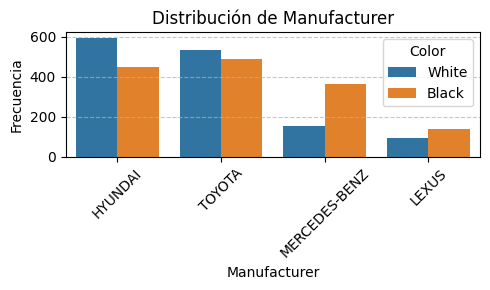

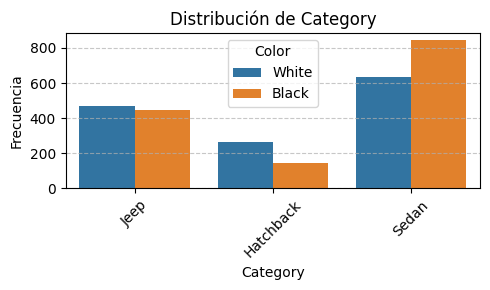

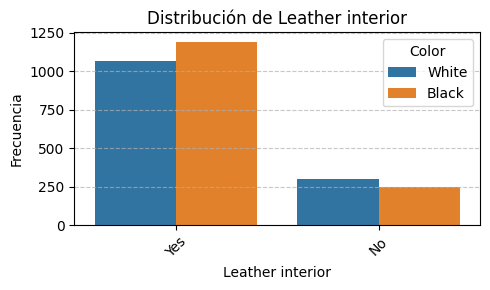

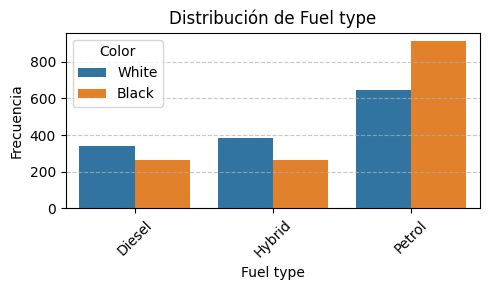

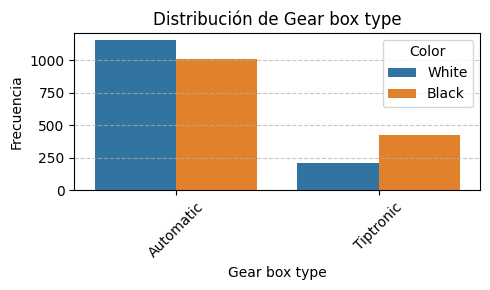

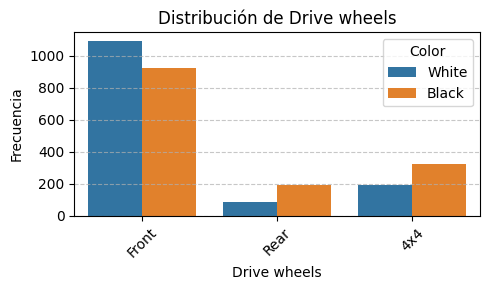

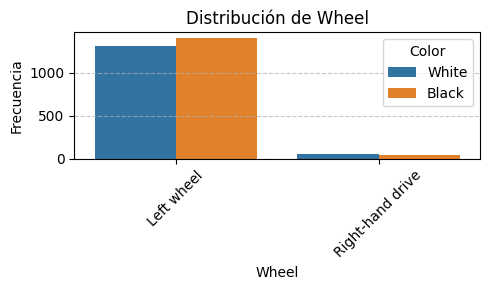

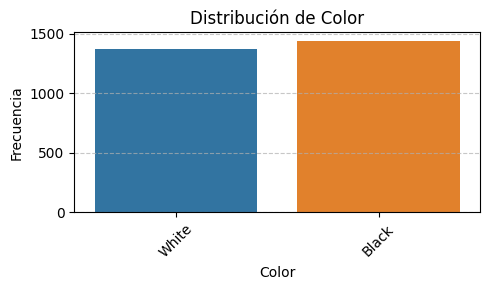

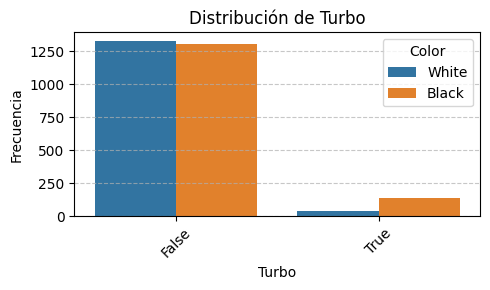

In [ ]:
# Loop sobre cada feature catregorica

for col in df.select_dtypes(include=['object','bool']).columns:
    plt.figure(figsize=(5, 3))

    sns.countplot(data=df, x=col, hue="Color")

    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

<ipython-input-37-994f17242db4>:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend(title='Color', bbox_to_anchor=(1.05, 1), loc='upper left')


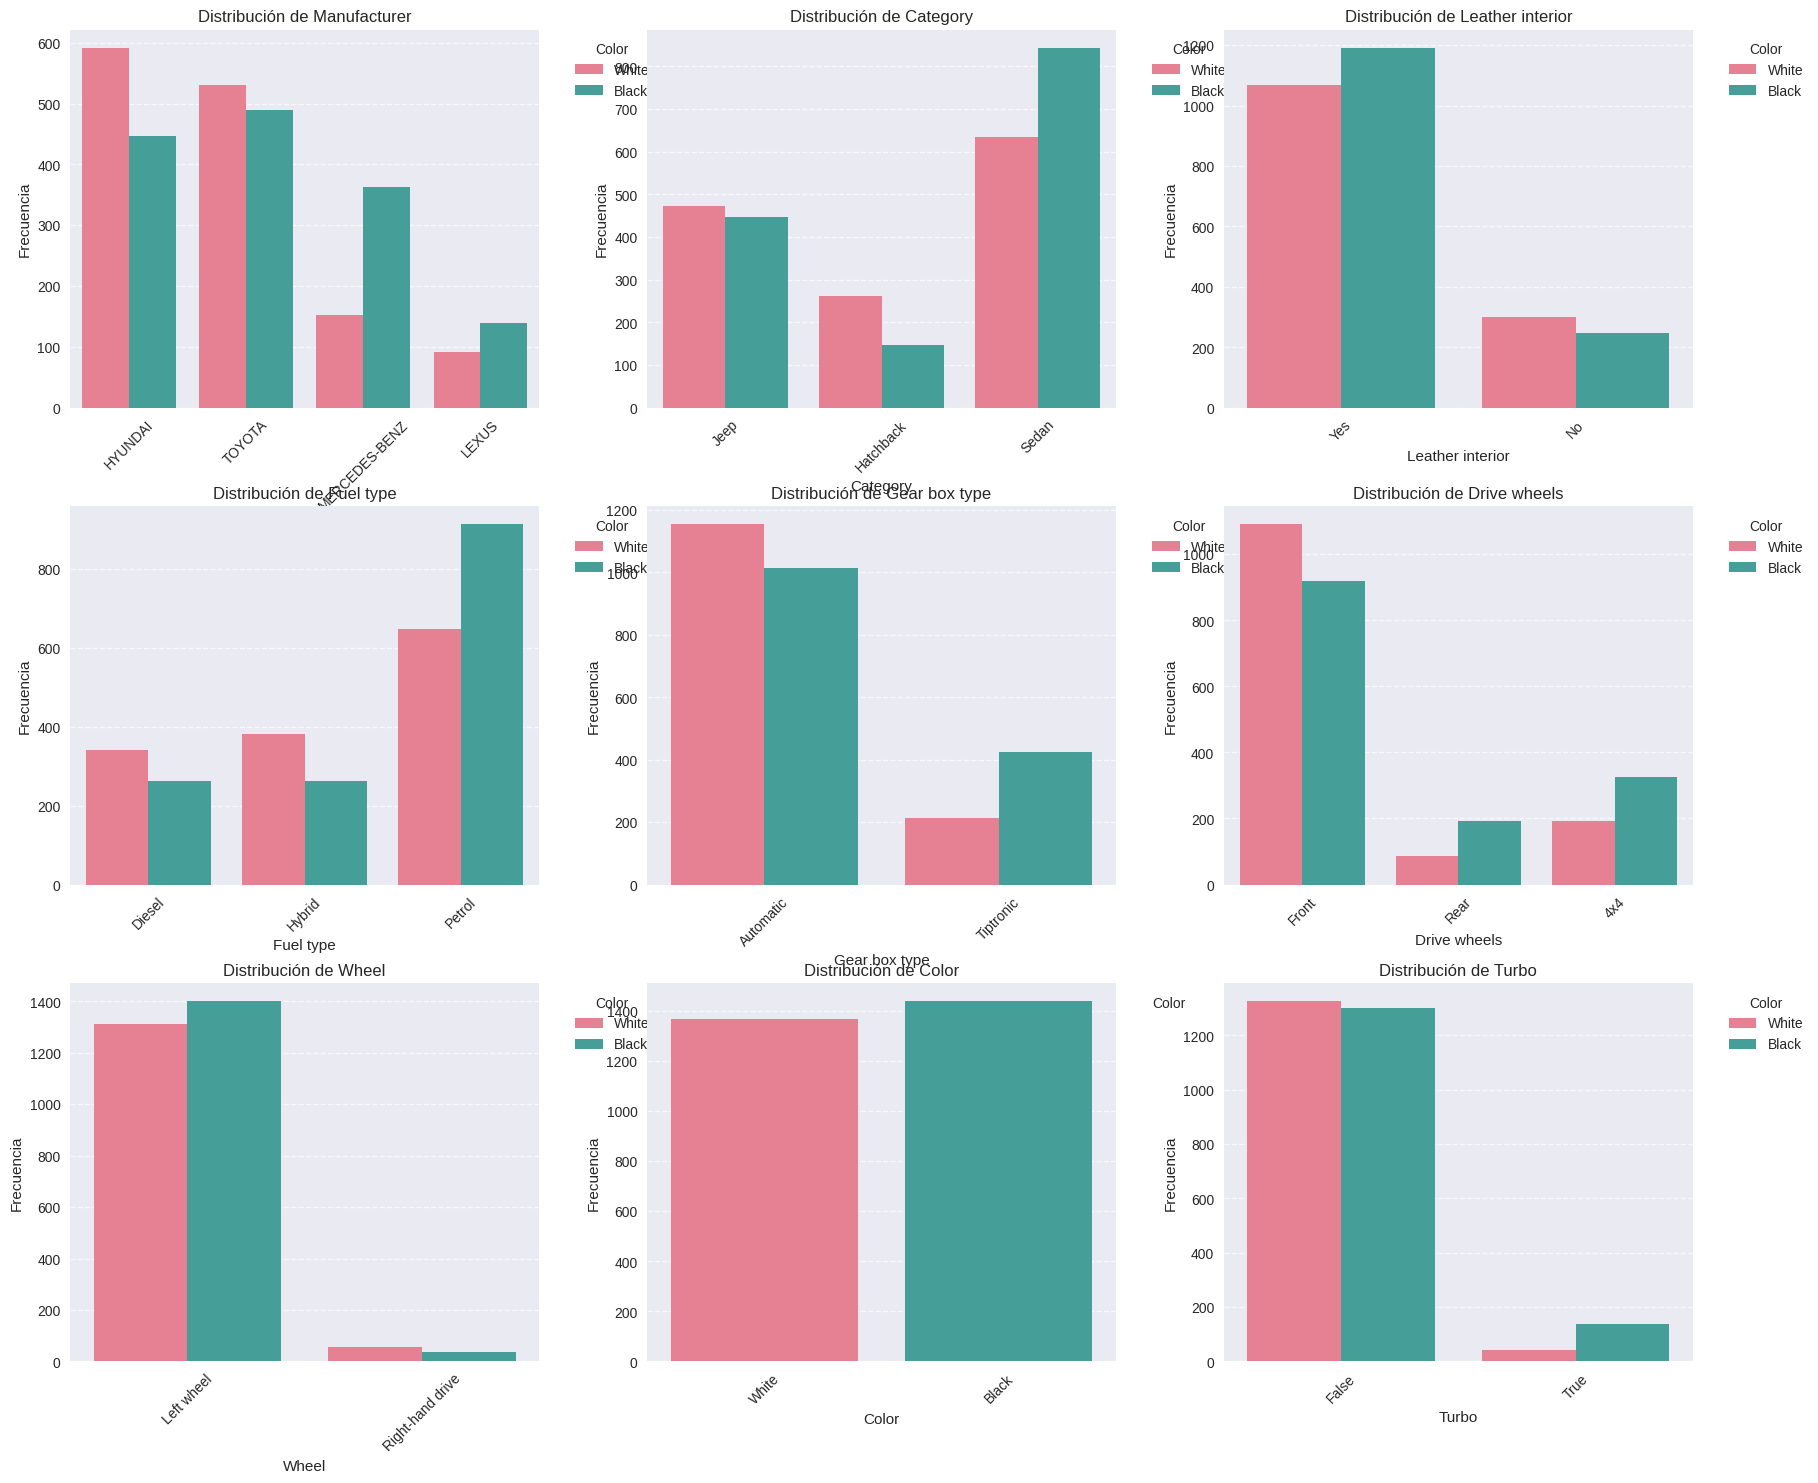

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Obtener las columnas categóricas
cat_cols = df.select_dtypes(include=['object', 'bool']).columns

# Configurar la figura con subplots (3 filas x 3 columnas)
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.tight_layout(pad=5.0)

# Aplanar el array de ejes para facilitar el acceso
axes = axes.flatten()

# Crear paleta HUSL
palette = sns.color_palette("husl", len(df["Color"].unique()))

# Loop para crear cada subplot
for i, col in enumerate(cat_cols):
    if i < 9:  # Solo mostramos 9 gráficos (3x3)
        sns.countplot(
            data=df,
            x=col,
            hue="Color",
            palette=palette,
            ax=axes[i]
        )
        axes[i].set_title(f'Distribución de {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frecuencia')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)
        axes[i].legend(title='Color', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ocultar ejes vacíos si hay menos de 9 gráficos
for j in range(i+1, 9):
    axes[j].axis('off')

plt.show()

A partir del grafico podemos observar como se distribuye la variable objetivo dentro de cada categoria, por lo que podemos interpretar cual es serian mejores varibles predictivas,vemos que la variable ¨Wheel¨ a priori tiene una cantidad similar de autos blancos o negros en cada uno de sus estados, como tambien la variable 'Turbo' obtenida a partir del desglose del campo 'Engine volume'.
Debido al desbalanceo de clases esa variable no sería una buena predictora, por lo que podriamos prescindir de ella, aunque lo mejor es evaluar mas adelante si defrinitivamente realizamos un drop de esa variable, las demás variables si bien no son excelentes predictoras tienen una diferencia que se puede apreciar, por lo que las conservaremos a posteriori para continuar con el anàlisis.

<ipython-input-14-b90bd02b3006>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Color", y=col, palette='magma')


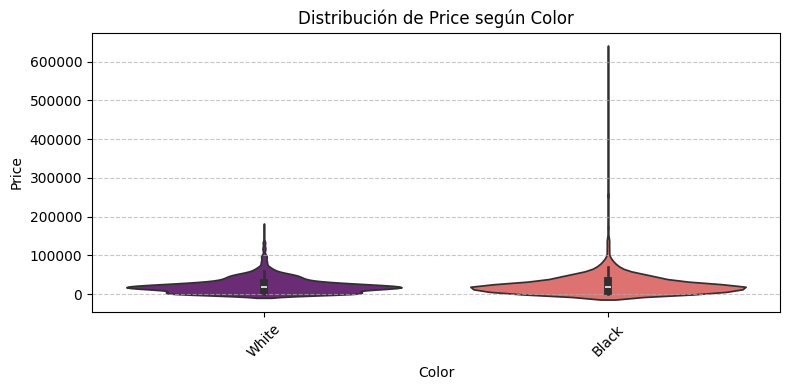

<ipython-input-14-b90bd02b3006>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Color", y=col, palette='magma')


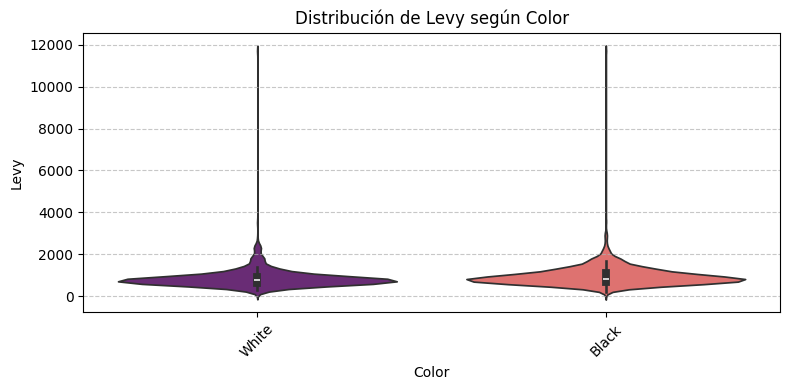

<ipython-input-14-b90bd02b3006>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Color", y=col, palette='magma')


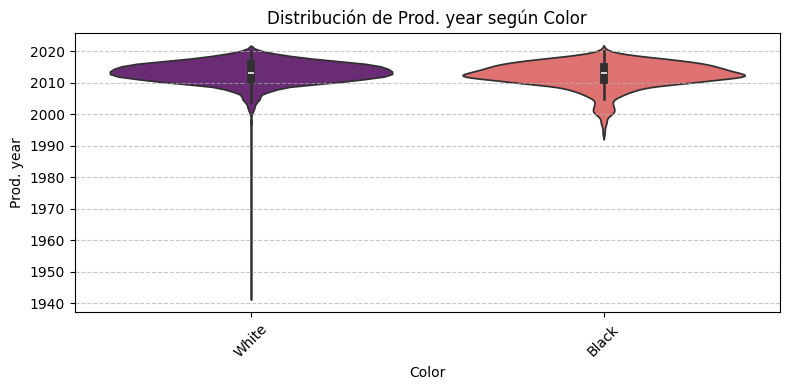

<ipython-input-14-b90bd02b3006>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Color", y=col, palette='magma')


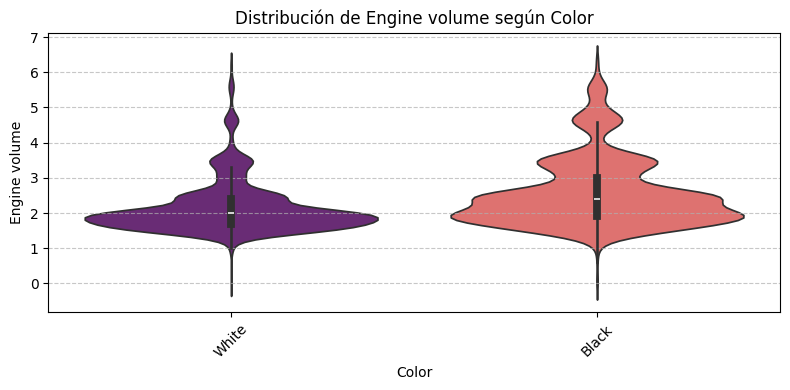

<ipython-input-14-b90bd02b3006>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Color", y=col, palette='magma')


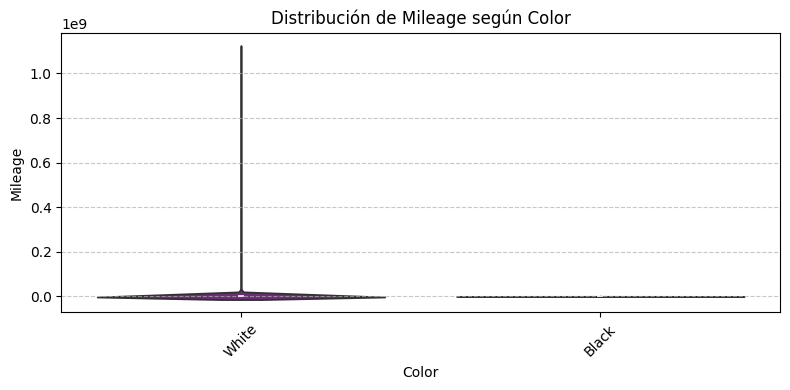

<ipython-input-14-b90bd02b3006>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Color", y=col, palette='magma')


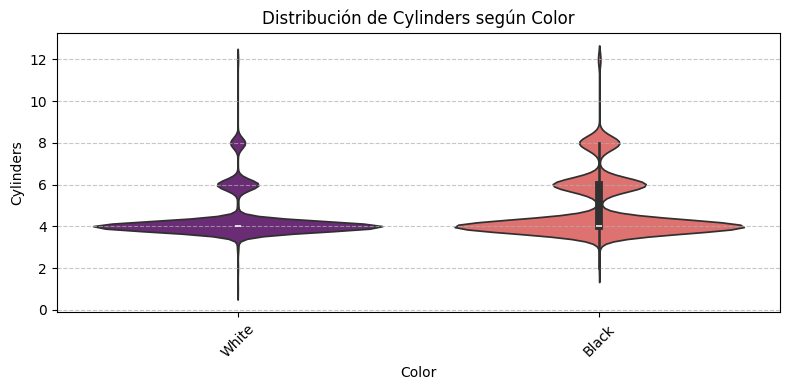

<ipython-input-14-b90bd02b3006>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Color", y=col, palette='magma')


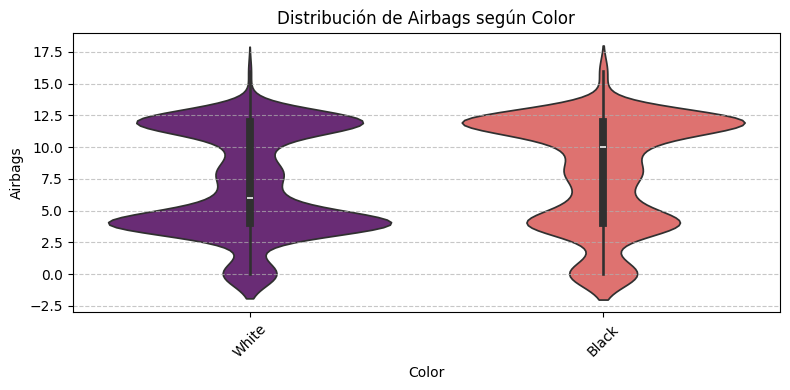

In [ ]:
# Loop en cada col numerica
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(8, 4))

    sns.violinplot(data=df, x="Color", y=col, palette='magma')

    plt.title(f'Distribución de {col} según Color')
    plt.xlabel('Color')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

Creamos histogramas y barplots para ver de forma mas clara la distribucion de los datos numericos.

<ipython-input-35-3ab77deea9f4>:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Color')  # La leyenda se genera automáticamente con la paleta
<ipython-input-35-3ab77deea9f4>:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Color')  # La leyenda se genera automáticamente con la paleta
<ipython-input-35-3ab77deea9f4>:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Color')  # La leyenda se genera automáticamente con la paleta
<ipython-input-35-3ab77deea9f4>:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start wit

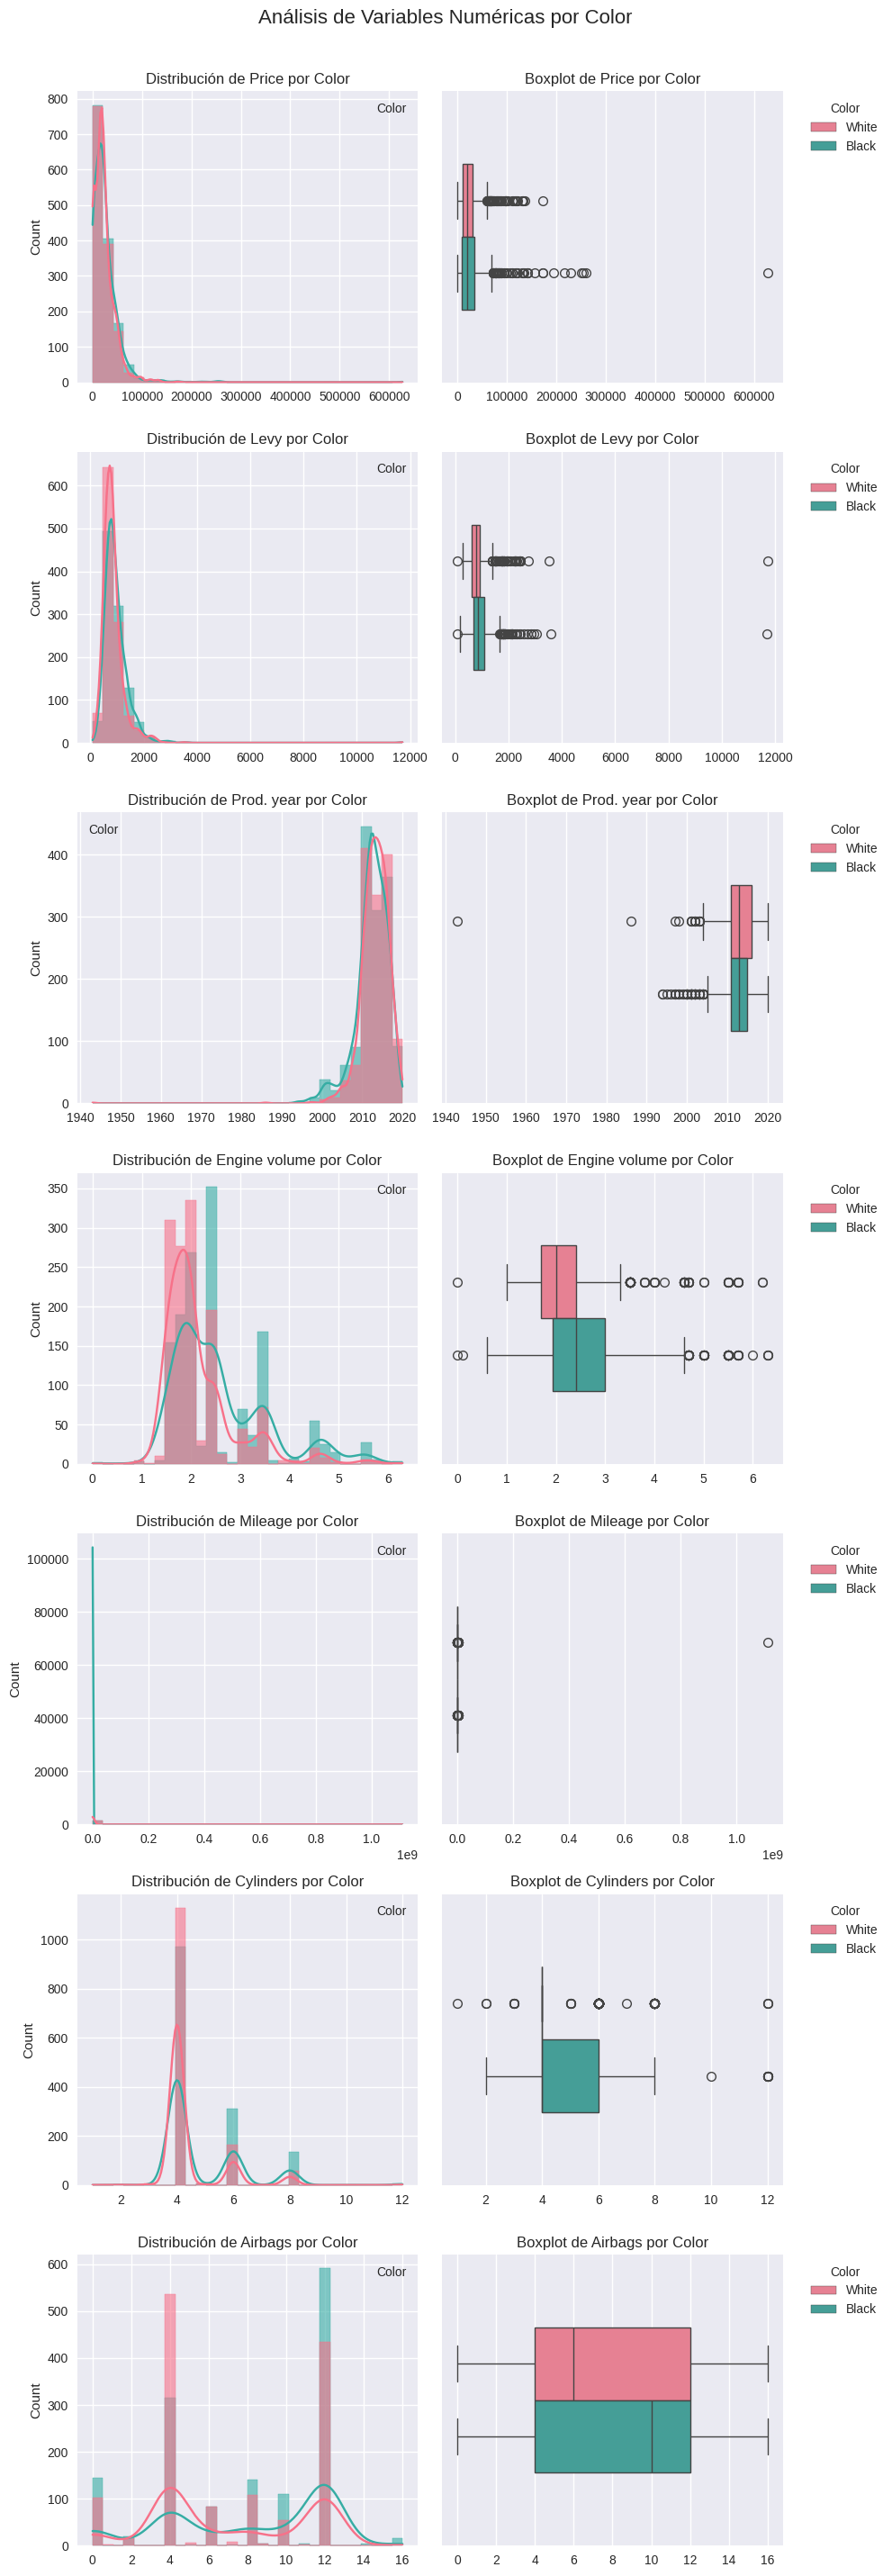

In [ ]:
# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Seleccionar variables numéricas
numeric_vars = df.select_dtypes(include=['int64', 'float64']).columns

# Obtener los valores únicos de la columna 'Color' para crear una paleta dinámica
unique_colors = df['Color'].unique()
color_palette = {}
# Puedes definir una paleta personalizada basada en los colores reales
# Aquí asignamos colores por defecto de seaborn, pero puedes personalizarlos
for i, color in enumerate(unique_colors):
    color_palette[color] = sns.color_palette("husl", n_colors=len(unique_colors))[i]

# Crear gráficos combinados con hue
plt.figure(figsize=(10, len(numeric_vars) * 4))

for i, var in enumerate(numeric_vars, 1):
    # Gráfico de distribución con hue
    plt.subplot(len(numeric_vars), 2, 2 * i - 1)
    sns.histplot(data=df,
                 x=var,
                 hue='Color',
                 kde=True,
                 bins=30,
                 palette=color_palette,  # Usar la paleta dinámica
                 alpha=0.6,
                 element='step')
    plt.title(f'Distribución de {var} por Color', fontsize=12)
    plt.xlabel('')
    plt.legend(title='Color')  # La leyenda se genera automáticamente con la paleta

    # Boxplot con hue
    plt.subplot(len(numeric_vars), 2, 2 * i)
    sns.boxplot(data=df,
                x=var,
                hue='Color',
                palette=color_palette,  # Usar la paleta dinámica
                width=0.5)
    plt.title(f'Boxplot de {var} por Color', fontsize=12)
    plt.xlabel('')
    plt.ylabel('')
    # Mover la leyenda fuera del gráfico
    plt.legend(title='Color', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.suptitle('Análisis de Variables Numéricas por Color', y=1.02, fontsize=16)  # Corregir el título principal
plt.show()


Como podemos apreciar en la grafica las variables Engine volume y Cylinder tendrìan la mejor capactidad predictiva si tenemos en cuenta el objetivo del problema que es identificar el color a partir del resto de las variables.

Como vemos hay varios registros que presentan kilometraje cero, lo ideal seria poder entender la naturaleza de estos valores para poder interpretar el dataset, pero como no tenemos acceso a información detallada del porqué esa caracteristica presenta valores cero o valores excesivamente altos es que tenemos que tomar una decisión preliminar para seguir adelante con el procesamiento de los datos.

Por lo que en nuestro caso realizaremos la eliminacion de todos los registros que presenten un valor para mileage fuera del rango de 100 a 500mil millas

Tambien podemos observar que existen registros con un volumen de motor y numero de cilindros que estan fuera de todo orden. como un tamaño de motor mas pequeño que 0.8, o un numero de cilindros menor a 3. Por lo que para esas instancias de registros he preferido eliminarlas y no introducir errores de partida en el conjunto de datos.

In [ ]:
engine_erroneo = df.loc[(df['Engine volume'] < 0.8) | (df['Cylinders'] < 3)]
engine_erroneo

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo
112,9,NaN,TOYOTA,2005,Sedan,No,Hybrid,1.6,18000,1,Automatic,4x4,Left wheel,White,5,False
119,21953,NaN,HYUNDAI,2013,Sedan,No,Hybrid,2.4,20000,2,Tiptronic,Front,Right-hand drive,Black,4,True
1015,4704,NaN,MERCEDES-BENZ,1999,Sedan,No,Petrol,0.6,142000,4,Tiptronic,Rear,Left wheel,Black,2,True
2227,35,NaN,TOYOTA,2010,Sedan,No,Petrol,1.6,240000,2,Automatic,Front,Left wheel,White,2,False
2437,8624,175.0,TOYOTA,2011,Hatchback,No,Petrol,0.1,0,3,Automatic,Front,Right-hand drive,Black,2,False
2783,60,NaN,TOYOTA,2009,Sedan,No,Hybrid,1.5,1000000,2,Automatic,Front,Left wheel,White,2,False
2948,6,87.0,MERCEDES-BENZ,2016,Sedan,Yes,Petrol,0.0,33600,6,Automatic,Rear,Left wheel,White,12,False
3614,18100,NaN,TOYOTA,2012,Hatchback,No,Hybrid,1.8,115000,2,Automatic,Front,Left wheel,Black,6,False
3928,78,87.0,MERCEDES-BENZ,2014,Sedan,Yes,Petrol,0.0,92800,8,Automatic,Rear,Left wheel,Black,12,False


Establecemos los limites de kilometrajes aceptados, y filtramos los registros que esten fuera del rango aceptado de ´Engine volume'y 'Cylinders´.

In [ ]:
# Definir límites realistas, recodrmos que son vahiculos usados.
km_min = 300  # Mín 500 millas
km_max = 500000  # Máx 500,000 millas

# Crear máscara de valores válidos
km_valido = (df['Mileage'] >= km_min) & (df['Mileage'] <= km_max)
engine_valido = (df['Engine volume'] > 0.8) | (df['Cylinders'] >= 3 | (df['Cylinders'] == 7))

# Aplicar máscaras
df_filtrado = df[km_valido & engine_valido].copy()

# Porcentaje de datos que se conservarán
print(f"Porcentaje de datos dentro de límites: {km_valido.mean()*100:.2f}%")

print(f"Registros después de limpieza: {len(df_filtrado)}")

#Convierto la columna target Color a una nueva 'Es_blanco' ya codificada como 1 o 0
df_filtrado['Es_Blanco'] = df_filtrado['Color'].apply(lambda x: 1 if x == 'White' else 0).astype(bool)
df_filtrado.drop('Color', axis=1, inplace=True)

df_filtrado.describe(include='all')

Porcentaje de datos dentro de límites: 96.61%
Registros después de limpieza: 2711


,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Airbags,Turbo,Es_Blanco
count,2711.000000,2113.000000,2711,2711.000000,2711,2711,2711,2711.000000,2711.000000,2711.000000,2711,2711,2711,2711.000000,2711,2711
unique,NaN,NaN,4,NaN,3,2,3,NaN,NaN,NaN,2,3,2,NaN,2,2
top,NaN,NaN,HYUNDAI,NaN,Sedan,Yes,Petrol,NaN,NaN,NaN,Automatic,Front,Left wheel,NaN,False,False
freq,NaN,NaN,1026,NaN,1423,2198,1508,NaN,NaN,NaN,2093,1945,2619,NaN,2539,1385
mean,24037.198820,899.883105,NaN,2012.847658,NaN,NaN,NaN,2.375397,125030.083364,4.635559,NaN,NaN,NaN,7.531538,NaN,NaN
std,23461.201925,504.475695,NaN,3.883073,NaN,NaN,NaN,0.893360,78884.892029,1.256119,NaN,NaN,NaN,4.193170,NaN,NaN
min,3.000000,87.000000,NaN,1943.000000,NaN,NaN,NaN,0.000000,500.000000,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN
25%,10036.000000,639.000000,NaN,2011.000000,NaN,NaN,NaN,1.800000,67000.000000,4.000000,NaN,NaN,NaN,4.000000,NaN,NaN
50%,19416.000000,781.000000,NaN,2013.000000,NaN,NaN,NaN,2.000000,115507.000000,4.000000,NaN,NaN,NaN,8.000000,NaN,NaN
75%,32066.500000,1053.000000,NaN,2015.000000,NaN,NaN,NaN,2.500000,166661.000000,4.000000,NaN,NaN,NaN,12.000000,NaN,NaN


Realizamos un drop de la feature ´Wheel´ ya que interpretamos que no aporta gran poder predictivo al modelo.

In [ ]:
df_filtrado = df_filtrado.drop(["Wheel", "Turbo"], axis=1)

df_filtrado.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Airbags,Es_Blanco
0,39493,891.0,HYUNDAI,2016,Jeep,Yes,Diesel,2.0,160931,4,Automatic,Front,4,True
1,1803,761.0,TOYOTA,2010,Hatchback,Yes,Hybrid,1.8,258909,4,Automatic,Front,12,True
2,1098,394.0,TOYOTA,2014,Sedan,Yes,Hybrid,2.5,398069,4,Automatic,Front,12,False
3,941,1053.0,MERCEDES-BENZ,2014,Sedan,Yes,Diesel,3.5,184467,6,Automatic,Rear,12,True
4,1019,1055.0,LEXUS,2013,Jeep,Yes,Hybrid,3.5,138038,6,Automatic,Front,12,True


In [ ]:
df_filtrado.shape

(2711, 14)


Finalmente nos quedamos con 2711 registros y 14 columnas.

## Valores nulos

A continuación visualizamos los registros que tienen valores nulos, y mas adelante trataremos de aplicar una tecnica para imputarlos (KNNImputer o SimpleImputer) en el caso de que sea indispensable mantener la caracteristica para incluirla en el modelo.


ANÁLISIS DE VALORES FALTANTES
Levy                598
Price                 0
Manufacturer          0
Prod. year            0
Category              0
Leather interior      0
Fuel type             0
Engine volume         0
Mileage               0
Cylinders             0
Gear box type         0
Drive wheels          0
Airbags               0
Es_Blanco             0
dtype: int64


<Axes: >

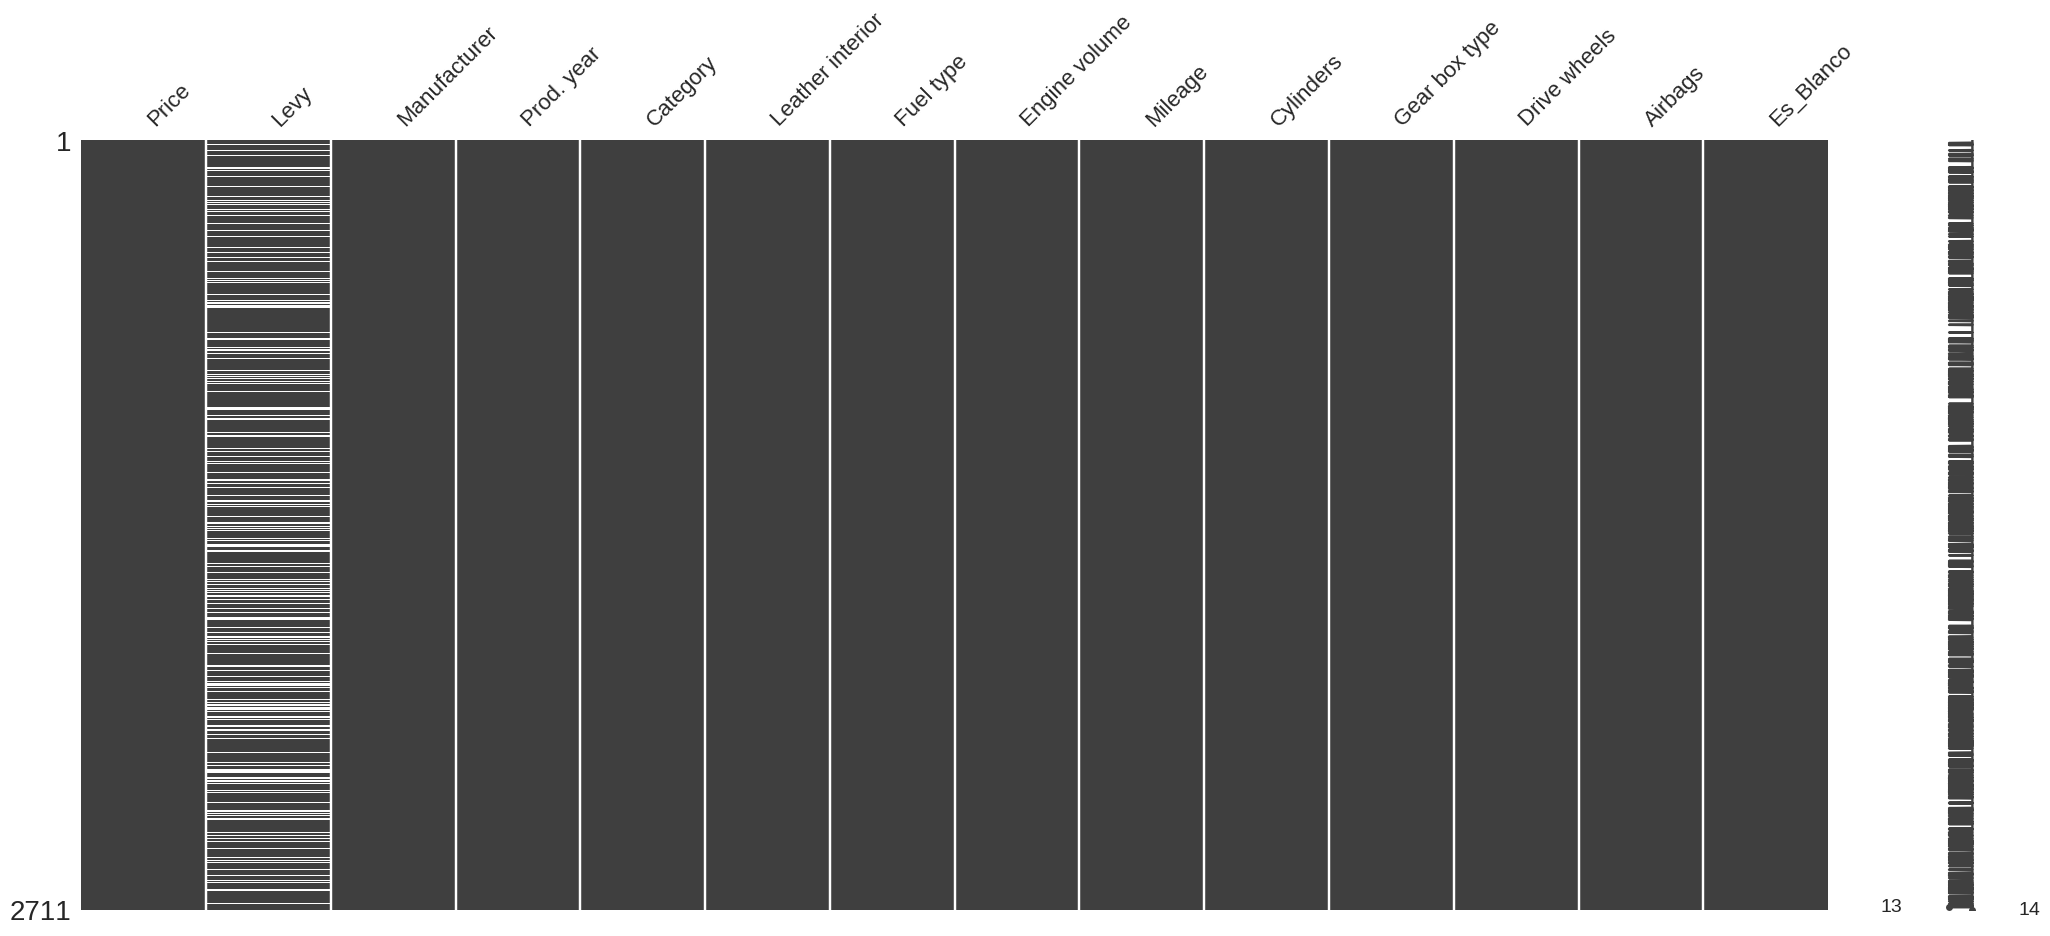

In [ ]:
import missingno as msno

# Análisis de valores nulos
print("\n" + "="*80)
print("ANÁLISIS DE VALORES FALTANTES")
print("="*80)
missing_data = df_filtrado.isnull().sum().sort_values(ascending=False)
print(missing_data)


msno.matrix(df_filtrado)

In [ ]:
cat_cols = df_filtrado.select_dtypes(include=['object', 'category','bool']).columns
print("\nValores faltantes en columnas categóricas:")
print(df_filtrado[cat_cols].isna().sum())


Valores faltantes en columnas categóricas:
Manufacturer        0
Category            0
Leather interior    0
Fuel type           0
Gear box type       0
Drive wheels        0
Es_Blanco           0
dtype: int64


In [ ]:
num_cols = df_filtrado.select_dtypes(include=['number']).columns
print("\nValores faltantes en columnas numéricas:")
print(df_filtrado[num_cols].isna().sum())


Valores faltantes en columnas numéricas:
Price              0
Levy             598
Prod. year         0
Engine volume      0
Mileage            0
Cylinders          0
Airbags            0
dtype: int64


Vemos que existe un elevado numero de valores nulos en la columna Levy,

Levy es una característica que como vimos previamente no presentaría un alto valor predictivo, aunque para analizar eso y correr modelos de SVM necesitamos tener valores diferentes de cero en esa característica. Decidiremos imputar luego los datos faltantes utilizando KNNImputer, y basándonos en los vecinos mas cercanos para completar la información.

## Verificamos la existencia de correlaciones entre variables:




Realizamos una matriz de correlacion utilizando el metodo spearman para identificar evidencias de variables altamente correlacionadas que podriamos excluir del conjunto de datos y reducir el costo computacional en el procesamiento.

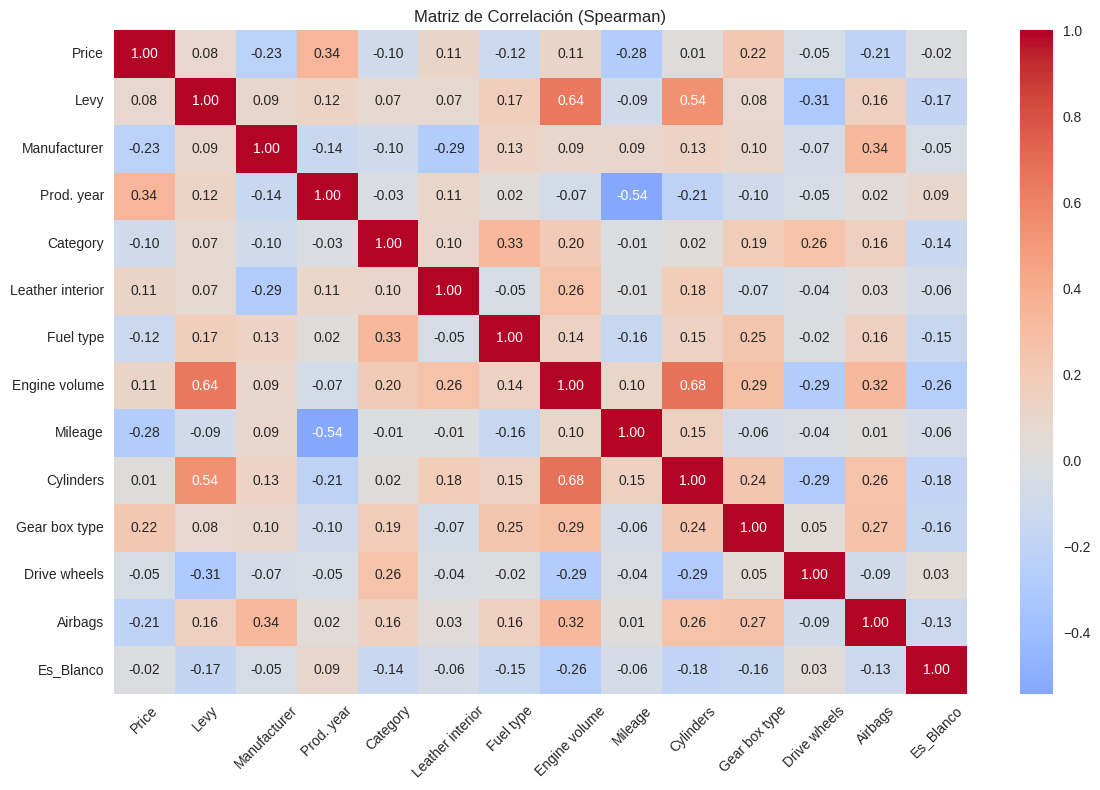


Top 10 correlaciones:
Engine volume  Cylinders        0.679107
Cylinders      Engine volume    0.679107
Engine volume  Levy             0.644979
Levy           Engine volume    0.644979
Prod. year     Mileage         -0.543143
Mileage        Prod. year      -0.543143
Cylinders      Levy             0.538260
Levy           Cylinders        0.538260
Price          Prod. year       0.344296
Prod. year     Price            0.344296
dtype: float64


In [ ]:
# 1. Codificación rápida de variables categóricas para análisis
df_encoded = df_filtrado.copy()
for col in df_filtrado.select_dtypes(include=['object', 'category']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_filtrado[col])

# 2. Matriz de correlación
plt.figure(figsize=(12, 8))
corr_matrix = df_encoded.corr(method='spearman')  # Spearman para relaciones no lineales
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Matriz de Correlación (Spearman)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Top de correlaciones (valor absoluto)
corr_pairs = corr_matrix.unstack().sort_values(key=abs, ascending=False)
unique_pairs = corr_pairs[corr_pairs.index.map(lambda x: x[0] != x[1])]
print("\nTop 10 correlaciones:")
print(unique_pairs.head(10))


Vemos que las correlaciones son menores a 70%, entre las variables con mayor correlacion como lo son "Engine volume" y "Cylinders", luego 'Mileage' y 'Prod. year' por lo que decidimos dejar todas las variables en el conjunto de datos y continuar adelante con el desarrollo del pipeline.

Con este preprocesamiento bàsico ya estamos en condiciones de realizar el resto de pasos utilizando los pipelines de scikitlearn para mantener el orden en el código.

El escalado y el encoding se haràn dentro del piepline.

## Punto 2: Obtener el mejor modelo posible con una máquina de vector soporte.


### Importamos *librerias*

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (StandardScaler, OneHotEncoder, FunctionTransformer)
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt
import seaborn as sns

### Hacemos la division del conjunto en entrenamiento y test.

A pesar de no tener clases deesbalanceadas decidimos hacer un muestreo estratificado asegurarnos clases balanceadas en el conjunto de entrenamiento.

In [ ]:
# División de datos CORREGIDA
X = df_filtrado.drop('Es_Blanco', axis=1)
y = df_filtrado['Es_Blanco']  # ¡Ahora es una Serie 1D!

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Convertimos y a numpy array 1D
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

categoricas = cat_cols.drop('Es_Blanco')
numericas = num_cols

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

print("Categoricas:",categoricas)
print("Numericas:", numericas)

X_train: (2168, 13)
X_test: (543, 13)
y_train: (2168,)
y_test: (543,)
Categoricas: Index(['Manufacturer', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels'],
      dtype='object')
Numericas: Index(['Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders',
       'Airbags'],
      dtype='object')


In [ ]:
# Definir los nombres de todas las columnas (combinando numéricas y categóricas)
feature_names = list(numericas) + list(categoricas)

Defino los conjuntos numericas y categoricas para luego realizar las transformaciones:

numericas:

categoricas:

### Transformaciones numericas:

Creamos las transformaciones numericas que seran utilziadas luego como parte del pipeline, para ello tenemos en cuenta todas las transformaciones numericas de un mismo tipo y le asignamos el mètodo de scikit learn que utilizaremos en cada una de ellas.

In [ ]:

# Pipeline para 'Mileage' (con transformación logarítmica)
mileage_transformer = Pipeline([
    ('log_transform', FunctionTransformer(np.log1p)),  # log(1 + x) para manejar ceros
    ('scaler', RobustScaler())  # Escalado
])

# Transformacion de columna numerica Levy

levy_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),   # Imputo Levy con la mediana,
    ('scaler', RobustScaler())
])

# Utilizo Robustscaler para el resto de las trasnformaciones numericas
otras_numericas_transformer = Pipeline([
    ('scaler', RobustScaler())
])



### Transformaciones categoricas:

El mismo procedimiento lo realizamos para las variables categoricas, procedemos a asignar a nuestro transformador categorico un one-hot encoder.

In [ ]:

categoricas_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-Hot Encoding
])

### Agregado de las transformaciones al pipeline: utilizando ColumnTransformer



Ahora asignamos todas las transformaciones que se realizarán en una variable ´preprocessor' utilizando para ello el ColumnTransformer que nos permite aplicar para cada columna un transformador previamente definido.

Vemos como queda el pipeline de transformación de las features.

Esta forma de mantener el código nos permite una modificación rápida y sin mayores incovenientes a la hora de iterar durante el proceso de análisis.

In [ ]:
# Unión con ColumnTransformer
# excluimos 'Mileage' y 'Levy' de la lista de features "numericas" ya que tendran su tratamiento particular
otras_numericas = [col for col in numericas if col not in ['Mileage', 'Levy']]

# Ahora definimos el preprocessor
preprocessor = ColumnTransformer([
    ('mileage', mileage_transformer, [numericas[4]]),  # eumericas[4] es'Mileage'
    ('levy', levy_transformer, [numericas[1]]),        # enumericas[1] es 'Levy'
    ('other_num', otras_numericas_transformer, otras_numericas),
    ('cat', categoricas_transformer, categoricas)
])
preprocessor

ColumnTransformer(transformers=[('mileage',
                                 Pipeline(steps=[('log_transform',
                                                  FunctionTransformer(func=<ufunc 'log1p'>)),
                                                 ('scaler', RobustScaler())]),
                                 ['Mileage']),
                                ('levy',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['Levy']),
                                ('other_num',
                                 Pipeline(steps=[('scaler', RobustScaler())]),
                                 ['Price', 'Prod. year', 'Engine volume',
                                  'Cylinders', 'Airbags']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Manufacturer', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels'],
      dtype='object'))])

## Pipeline para el SVM

Ahora definimos el pipeline para correr nuesttra máquina de vector soporte SVM, para ello utilizamos el preprocesador antes definido, sumamos a ello una selección automática de variables con SelectKBest y luego utilizamos la función de "Support Vector Classification" de scikitlearn SVC.

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score, balanced_accuracy_score

# Pipeline corregidofrom sklearn.metrics import make_scorer, accuracy_score, roc_auc_score
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),

    # Selección de características con número fijo de características
    ('feature_selection', SelectKBest(score_func=f_classif)),  # Fija un número en lugar de 'all
    ('svm', SVC(
        random_state=42,
        probability=True
    ))
])

svm_pipeline


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('mileage',
                                                  Pipeline(steps=[('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Mileage']),
                                                 ('levy',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Levy']),
                                                 ('other_num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler(...,
                                                  ['Price', 'Prod. year',
                                                   'Engine volume', 'Cylinders',
                                                   'Airbags']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Manufacturer', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels'],
      dtype='object'))])),
                ('feature_selection', SelectKBest()),
                ('svm', SVC(probability=True, random_state=42))])

### Grilla de Parametros

La elección de los valores numéricos para los hiperparámetros C y gamma en modelos SVM requiere cierta experimentación, ya que influyen directamente en la capacidad del modelo para generalizar.

En el caso del parámetro C, que controla la regularización, valores pequeños como 0.001 o 0.1 favorecen un margen más amplio, tolerando algunas clasificaciones incorrectas y ayudando así a evitar el sobreajuste, especialmente en datos ruidosos. Valores intermedios como 1 o 10 buscan un equilibrio entre un buen margen y una clasificacion correcta de la mayoría de los puntos, mientras que valores grandes como 100 o 1000 priorizan la clasificación exacta de los datos de entrenamiento, lo que incrementa el riesgo de sobreajuste.

En tanto el parámetro gamma, se utiliza en kernels no lineales y determina la influencia de cada punto de entrenamiento: valores muy pequeños como 0.0001 o 0.001 extienden la influencia a mayores distancias, lo que puede llevar a un modelo subajustados en tanto que valores intermedios 0.01 o 0.1 suelen ofrecer un buen compromiso, y valores grandes 1 o 10 restringen la influencia a zonas muy locales, aumentando la probabilidad de sobreajuste.


In [ ]:
#'feature_selection__k': [5, 10
# Separamos los diferentes hieprparametros que seran testados en cada kernel
param_grid = [
    {
        'feature_selection__k': [4,6,7,8],
        'svm__C': [0.1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
        'svm__kernel': ['linear']
    },
        {
        'feature_selection__k': [4,6,7,8],
        'svm__C': [5,10,15,20,25,30],
        'svm__gamma': [0.01,0.03,0.05,0.1,1,5,10,15,20],
        'svm__kernel': ['rbf']
    },
]


Ahora configuro un objeto GridSearchCV para realizar una búsqueda de de los hiperparámetros definidos en param_grid sobre el pipeline de SVM, utilizando validación cruzada con 3 particiones (cv=3) para evaluar el desempeño de cada combinación de parámetros.
Encuanto a las metricas me decido por incluir accuracy y el área bajo la curva ROC, el parámetro refit='roc_auc' indica que, una vez evaluadas todas las combinaciones, se volverá a entrenar el modelo usando la mejor configuración según la métrica roc_auc;
n_jobs=-1 permite usar todos los núcleos disponibles del procesador para acelerar el proceso y verbose=1 proporciona información detallada sobre el progreso de la búsqueda.

In [ ]:
# Configurar GridSearchCV
grid_search = GridSearchCV(
    svm_pipeline,
    param_grid,
    cv=3,
    scoring=['accuracy', 'roc_auc'],
    refit='roc_auc',  # Métrica principal para seleccionar el mejor modelo
    n_jobs=-1,
    verbose=1)

grid_search

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('mileage',
                                                                         Pipeline(steps=[('log_transform',
                                                                                          FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['Mileage']),
                                                                        ('levy',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['Levy']),
                                                                        ('other_num',
                                                                         Pipeline(st...
                                            random_state=42))]),
             n_jobs=-1,
             param_grid=[{'feature_selection__k': [4, 6, 7, 8],
                          'svm__C': [0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                     13, 14, 15, 16, 17, 18, 19, 20],
                          'svm__kernel': ['linear']},
                         {'feature_selection__k': [4, 6, 7, 8],
                          'svm__C': [5, 10, 15, 20, 25, 30],
                          'svm__gamma': [0.01, 0.03, 0.05, 0.1, 1, 5, 10, 15,
                                         20],
                          'svm__kernel': ['rbf']}],
             refit='roc_auc', scoring=['accuracy', 'roc_auc'], verbose=1)

guardo los nobmres de columnas

In [ ]:
feature_names = X_train.columns.tolist()

Preprocessing

In [ ]:

# Entrenamiento con verificación
try:
    # Primero prueba con pocos datos
    grid_search.fit(X_train[:100], y_train[:100])
    print("¡Prueba exitosa con subset de datos!")

    # Luego entrena con todos los datos
    grid_search.fit(X_train, y_train)

    # Evaluación
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]

    print("\nMétricas finales:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")

except Exception as e:
    print(f"\nError durante el entrenamiento: {str(e)}")
    print("\nPasos para debuggear:")
    print("1. Verifica que no haya NaN en X_train:", X_train.isnull().sum())
    print("2. Prueba el preprocesamiento solo:")
    print("   X_transformed = preprocessor.fit_transform(X_train)")
    print("   print('¿Hay NaN?:', np.isnan(X_transformed).any())")


Fitting 3 folds for each of 300 candidates, totalling 900 fits
¡Prueba exitosa con subset de datos!
Fitting 3 folds for each of 300 candidates, totalling 900 fits

Métricas finales:
Accuracy: 0.6206
ROC AUC: 0.6652


In [ ]:
print(f"\nMejor score de validación cruzada: {grid_search.best_score_:.4f}")
print(f"Mejor combinación de parámetros: {grid_search.best_params_}")
print(f"\nMejor score de validación cruzada: {grid_search.best_estimator_}")
print(f"\nMejor score de validación cruzada: {grid_search.best_estimator_}")




Mejor score de validación cruzada: 0.6674
Mejor combinación de parámetros: {'feature_selection__k': 8, 'svm__C': 5, 'svm__kernel': 'linear'}

Mejor score de validación cruzada: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('mileage',
                                                  Pipeline(steps=[('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Mileage']),
                                                 ('levy',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('

In [ ]:
print(grid_search.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_feature_selection__k', 'param_svm__C', 'param_svm__kernel', 'param_svm__gamma', 'params', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy', 'split0_test_roc_auc', 'split1_test_roc_auc', 'split2_test_roc_auc', 'mean_test_roc_auc', 'std_test_roc_auc', 'rank_test_roc_auc'])


Mejor valor medio

In [ ]:
print(f"\nMejor score de validación cruzada: {grid_search.best_score_:.4f}")
print(f"Mejor combinación de parámetros: {grid_search.best_params_}")
print("\nMejor modelo (estimator) encontrado:")
print(grid_search.best_estimator_)

# Obtener el valor medio del score de validación cruzada para la mejor combinación de parámetros
best_mean_test_score = grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_]
print(f"\nValor medio del score de validación cruzada para el mejor modelo: {best_mean_test_score:.4f}")

# Obtener los valores de los parámetros del mejor modelo
best_params = grid_search.best_params_
print("\nValores de los parámetros del mejor modelo:")
for param, value in best_params.items():
    print(f"{param}: {value}")

best_accuracies = grid_search.cv_results_['rank_test_accuracy']
best_auc = grid_search.cv_results_['rank_test_roc_auc']


Mejor score de validación cruzada: 0.6674
Mejor combinación de parámetros: {'feature_selection__k': 8, 'svm__C': 5, 'svm__kernel': 'linear'}

Mejor modelo (estimator) encontrado:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('mileage',
                                                  Pipeline(steps=[('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Mileage']),
                                                 ('levy',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  

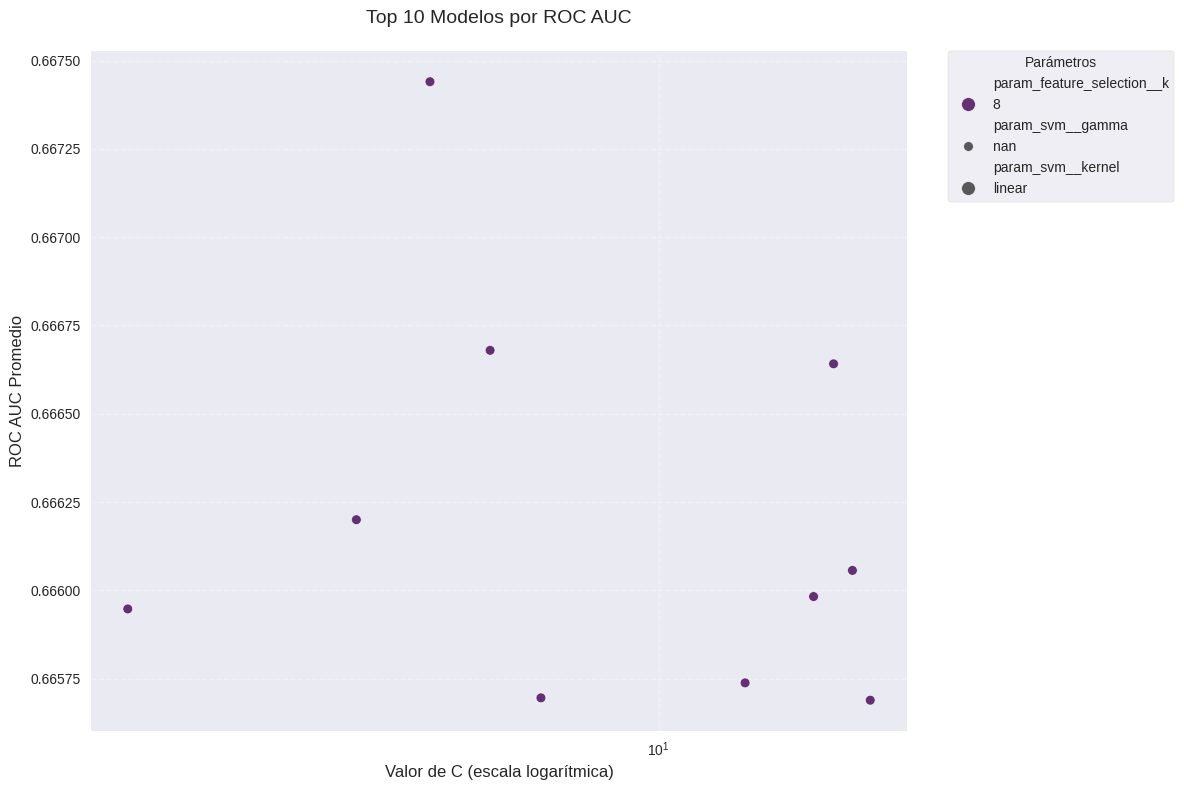

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preparar DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)
sorted_results_df = results_df.sort_values(by=['rank_test_roc_auc', 'rank_test_accuracy'])
top_10_models = sorted_results_df.head(10).copy()

# Convertir tipos de datos
top_10_models['param_feature_selection__k'] = top_10_models['param_feature_selection__k'].astype('Int64')
top_10_models['param_svm__C'] = top_10_models['param_svm__C'].astype(float)
top_10_models['param_svm__gamma'] = top_10_models['param_svm__gamma'].astype(str)
top_10_models['param_svm__kernel'] = top_10_models['param_svm__kernel'].astype(str)

# Crear figura con tamaño adecuado
plt.figure(figsize=(12, 8))

# Scatter plot con todas las variables
scatter = sns.scatterplot(
    data=top_10_models,
    x='param_svm__C',
    y='mean_test_roc_auc',
    hue='param_feature_selection__k',
    size='param_svm__gamma',
    style='param_svm__kernel',
    palette='viridis',
    sizes=(50, 200),  # Rango de tamaños para gamma
    markers={'linear': 'o', 'rbf': 's'},
    alpha=0.8,
    s=100
)

# Configuración del gráfico
plt.xscale('log')
plt.xlabel('Valor de C (escala logarítmica)', fontsize=12)
plt.ylabel('ROC AUC Promedio', fontsize=12)
plt.title('Top 10 Modelos por ROC AUC', fontsize=14, pad=20)

# Ajustar posición de la leyenda
plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0,
    title='Parámetros',
    frameon=True
)

# Mejorar la legibilidad
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

plt.show()

Top 10 modelos por Accuracy

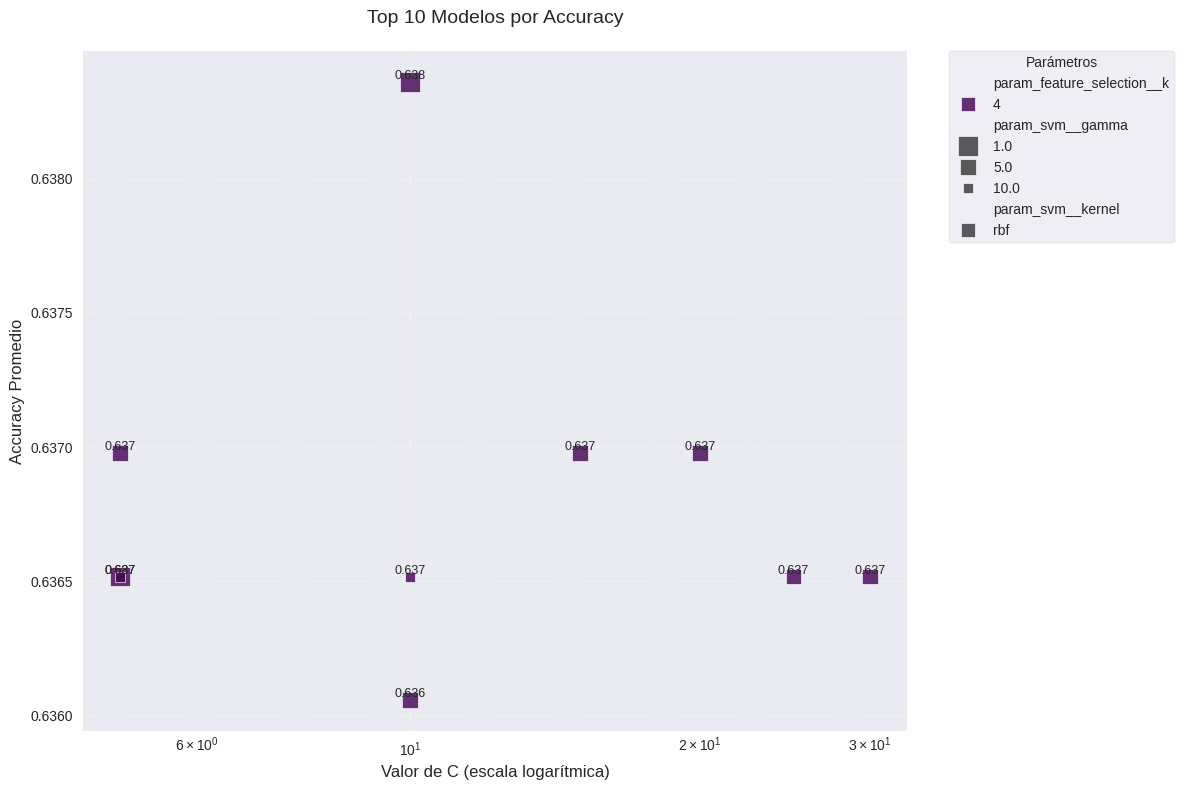

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preparar DataFrame ordenado por accuracy
sorted_results_df = results_df.sort_values(by='rank_test_accuracy')
top_10_accuracy = sorted_results_df.head(10).copy()

# Convertir tipos de datos
top_10_accuracy['param_feature_selection__k'] = top_10_accuracy['param_feature_selection__k'].astype('Int64')
top_10_accuracy['param_svm__C'] = top_10_accuracy['param_svm__C'].astype(float)
top_10_accuracy['param_svm__gamma'] = top_10_accuracy['param_svm__gamma'].astype(str)
top_10_accuracy['param_svm__kernel'] = top_10_accuracy['param_svm__kernel'].astype(str)

# Crear figura
plt.figure(figsize=(12, 8))

# Scatter plot para accuracy
scatter = sns.scatterplot(
    data=top_10_accuracy,
    x='param_svm__C',
    y='mean_test_accuracy',
    hue='param_feature_selection__k',
    size='param_svm__gamma',
    style='param_svm__kernel',
    palette='viridis',
    sizes=(50, 200),
    markers={'linear': 'o', 'rbf': 's'},
    alpha=0.8,
    s=100
)

# Configuración del gráfico
plt.xscale('log')
plt.xlabel('Valor de C (escala logarítmica)', fontsize=12)
plt.ylabel('Accuracy Promedio', fontsize=12)
plt.title('Top 10 Modelos por Accuracy', fontsize=14, pad=20)

# Añadir valores de accuracy como etiquetas
for i, row in top_10_accuracy.iterrows():
    plt.text(
        x=row['param_svm__C'],
        y=row['mean_test_accuracy'],
        s=f"{row['mean_test_accuracy']:.3f}",
        fontsize=9,
        ha='center',
        va='bottom'
    )

# Leyenda
plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0,
    title='Parámetros',
    frameon=True
)

# Mejorar visualización
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

plt.show()

Decision:

En el contexto del problema de repintado de coches (blanco vs. negro), aunque ambos errores de clasificación parecieran igualmente relevantes, el ROC AUC es más adecuado por su capacidad para evaluar el rendimiento del modelo independientemente del umbral de decisión sumado a su robustez frente a posibles desbalances.
El accuracy solo mide la proporción de aciertos globales, el ROC AUC sin embargo tiene en cuenta cómo se comporta el modelo en todos los posibles puntos de corte, por lo que resulta interesante si en el futuro se necesita minimizar los falsos positivos o falsos negativos.

Por lo tanto mi eleccion se basara en el modelo que presente un mejor ROC AUC. ya que para nuestro problema proporciona una visión más fiable para tomar decisiones estratégicas, sobre todo teniendo en cuenta que los valores obtenidos en principio antes del bagging o stacking no son tan buenos.

Visualizar Accuracy y AUC

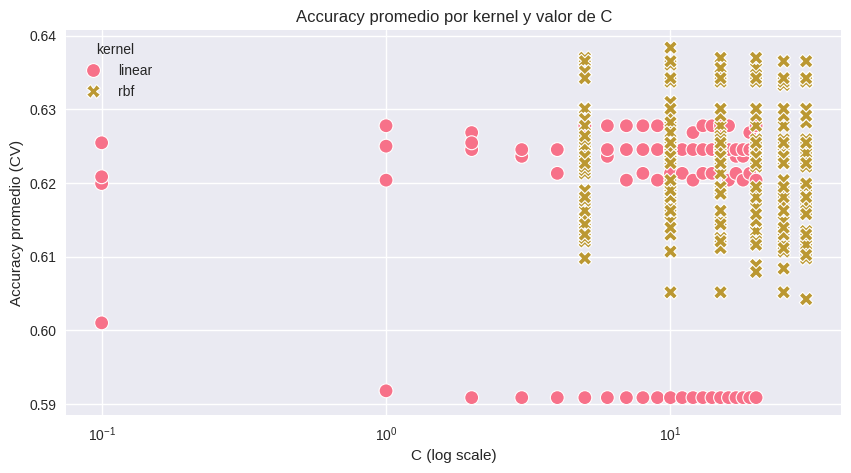

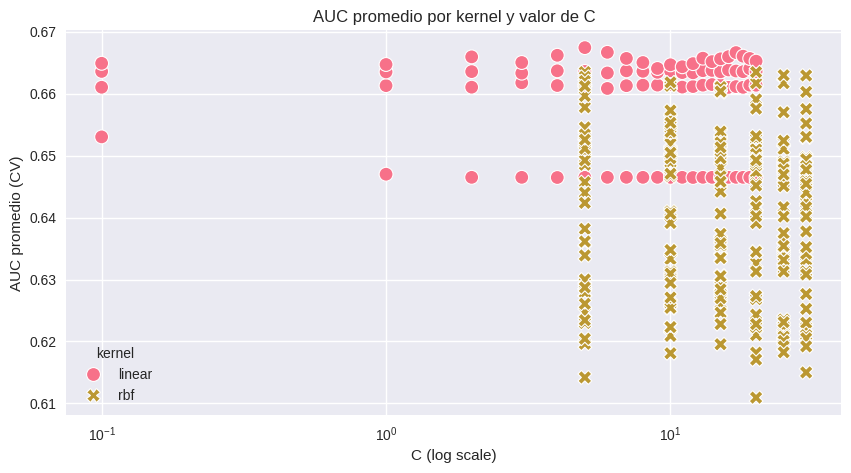

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
## Convertimos los resultados a un DataFrame de pandas para facilitar la inspección
results_df = pd.DataFrame(grid_search.cv_results_)

results_df['param_C'] = results_df['param_svm__C'].astype(float)
results_df['param_gamma'] = results_df['param_svm__gamma'].fillna(-1)
results_df['kernel'] = results_df['param_svm__kernel']

# Plot accuracy
plt.figure(figsize=(10, 5))
sns.scatterplot(data=results_df, x='param_C', y='mean_test_accuracy', hue='kernel', style='kernel', s=100)
plt.xscale('log')
plt.title('Accuracy promedio por kernel y valor de C')
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy promedio (CV)')
plt.grid(True)
plt.show()

# Plot AUC
plt.figure(figsize=(10, 5))
sns.scatterplot(data=results_df, x='param_C', y='mean_test_roc_auc', hue='kernel', style='kernel', s=100)
plt.xscale('log')
plt.title('AUC promedio por kernel y valor de C')
plt.xlabel('C (log scale)')
plt.ylabel('AUC promedio (CV)')
plt.grid(True)
plt.show()


20 mejores modelos, visualizacion

<ipython-input-41-f968c3a4e133>:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1.0' '5.0' '5.0' '5.0' '1.0' '5.0' '5.0' '10.0' '10.0' '5.0' '1.0'
 '10.0' '15.0' '1.0' '10.0' '1.0' '20.0' '20.0' '20.0' '20.0' '20.0'
 '20.0' '15.0' '15.0' '15.0' '10.0' '15.0' '15.0' '10.0' '1.0' '10.0'
 '10.0' '10.0' '10.0' '10.0' '10.0' '20.0' '15.0' '20.0' '20.0' '20.0'
 '20.0' '20.0' '15.0' '15.0' '15.0' '15.0' '15.0' '0.01' '0.03']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  top_50_models.loc[:, 'param_svm__gamma'] = top_50_models['param_svm__gamma'].astype(str)


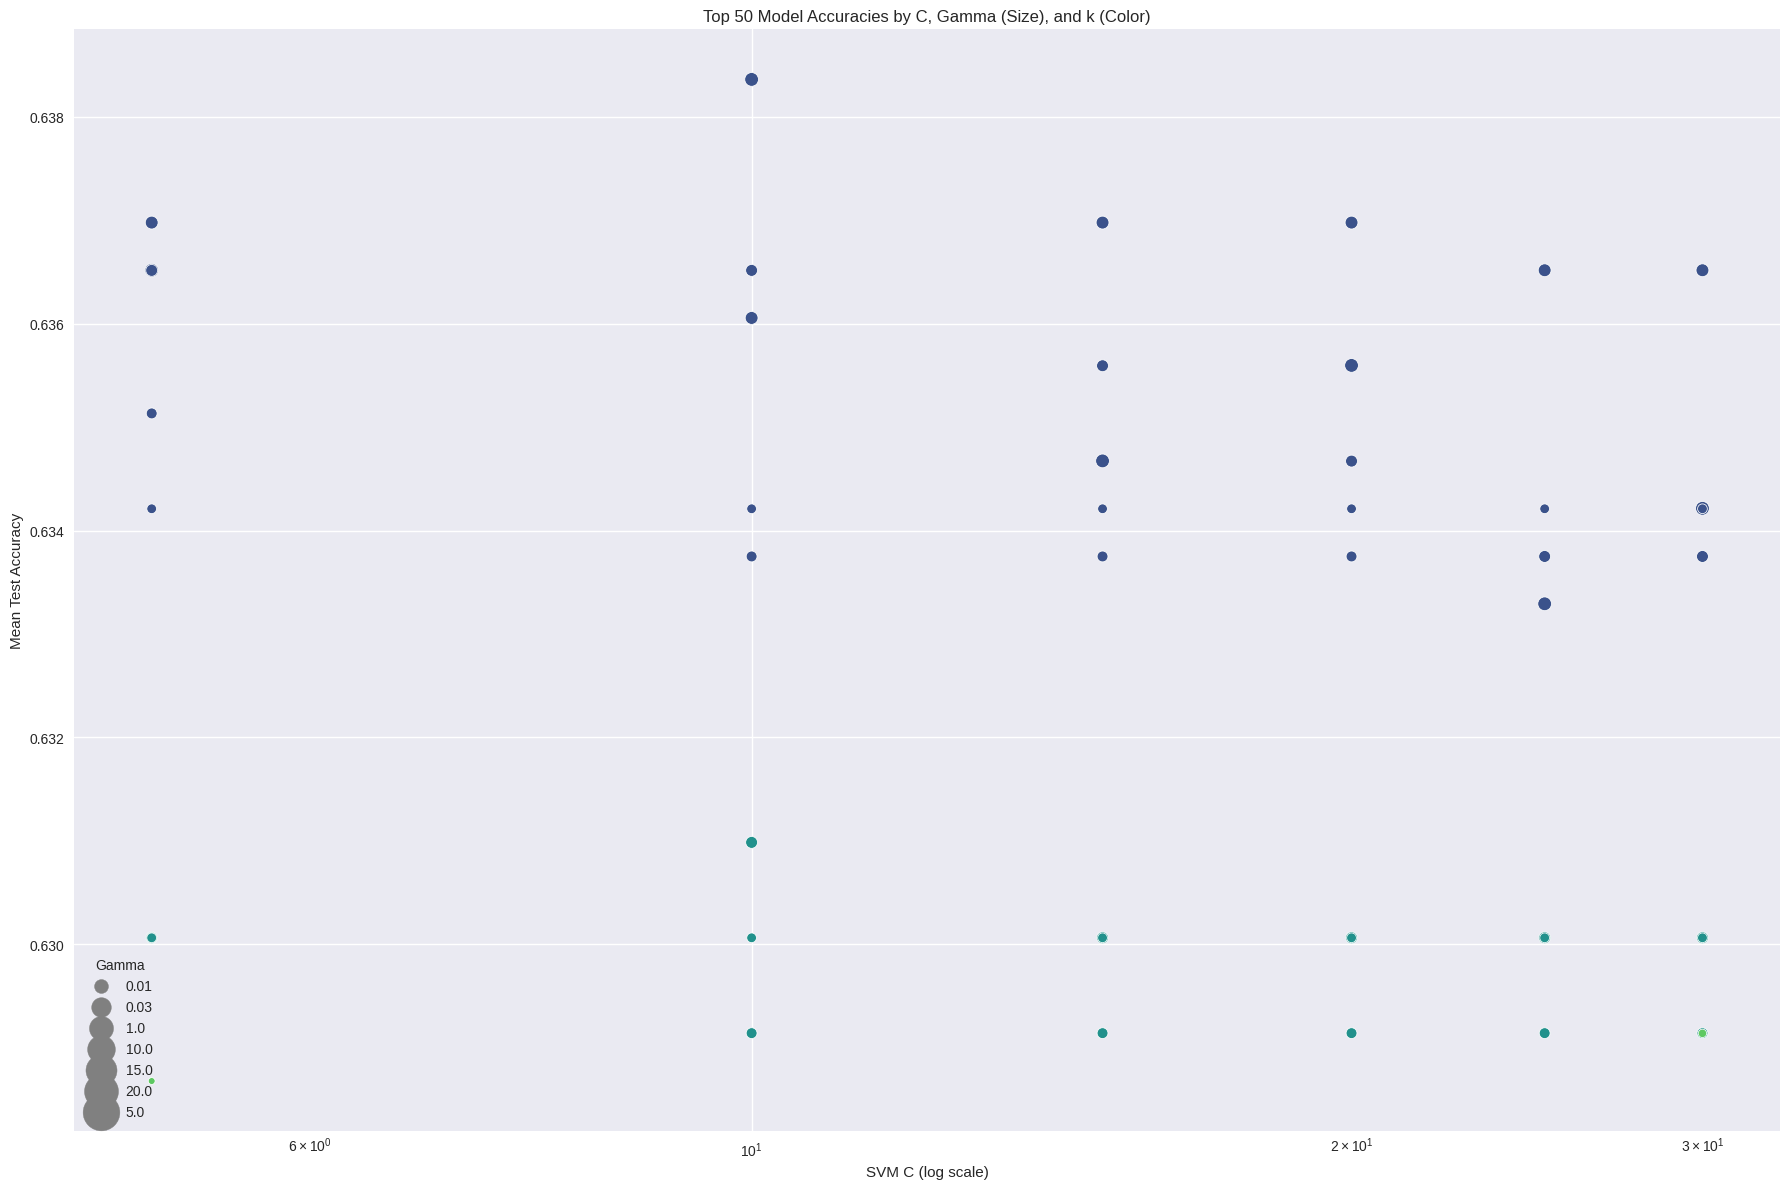

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertimos los resultados a un DataFrame de pandas para facilitar la inspección
results_df = pd.DataFrame(grid_search.cv_results_)

# Ordenamos el DataFrame por la métrica de rendimiento (por ejemplo, mean_test_accuracy) de forma descendente
# Reemplaza 'mean_test_accuracy' con la métrica que estás utilizando para evaluar tus modelos
sorted_results_df = results_df.sort_values(by='mean_test_accuracy', ascending=False)

# Seleccionamos los primeros 50 modelos
top_50_models = sorted_results_df.head(50).copy()

# Asegurarse de tipos correctos
top_50_models.loc[:, 'param_feature_selection__k'] = pd.to_numeric(top_50_models['param_feature_selection__k'], errors='coerce').astype('Int64')
top_50_models.loc[:, 'param_svm__C'] = pd.to_numeric(top_50_models['param_svm__C'], errors='coerce').astype(float)
top_50_models.loc[:, 'param_svm__gamma'] = top_50_models['param_svm__gamma'].astype(str)

# Obtener todos los valores únicos de k
k_values = sorted(top_50_models['param_feature_selection__k'].unique())

# Crear un mapa de colores para todos los valores de k
# Puedes elegir la paleta de colores que prefieras (e.g., 'viridis', 'plasma', 'tab10')
k_colors = sns.color_palette('viridis', n_colors=len(k_values))
k_color_map = dict(zip(k_values, k_colors))

# Gráfico
plt.figure(figsize=(18, 12))
sns.scatterplot(data=top_50_models, x='param_svm__C', y='mean_test_accuracy', hue='param_feature_selection__k', palette=k_color_map, size='param_svm__gamma', marker='o')

plt.xscale('log')
plt.xlabel('SVM C (log scale)')
plt.ylabel('Mean Test Accuracy')
plt.title('Top 50 Model Accuracies by C, Gamma (Size), and k (Color)')
plt.legend(title='k', loc='upper right')

# Añadir leyenda para gamma (tamaño de los puntos)
handles, labels = plt.gca().get_legend_handles_labels()
# La leyenda de 'k' ahora debería estar completa

gamma_sizes = sorted(top_50_models['param_svm__gamma'].unique())
size_elements = [plt.scatter([], [], s=100 * (i + 1), marker='o', color='gray', label=g) for i, g in enumerate(gamma_sizes)] # Ajusta el factor de tamaño si es necesario

plt.legend(handles=size_elements, labels=list(gamma_sizes), title='Gamma', loc='lower left')

plt.grid(True)
plt.tight_layout()
plt.show()

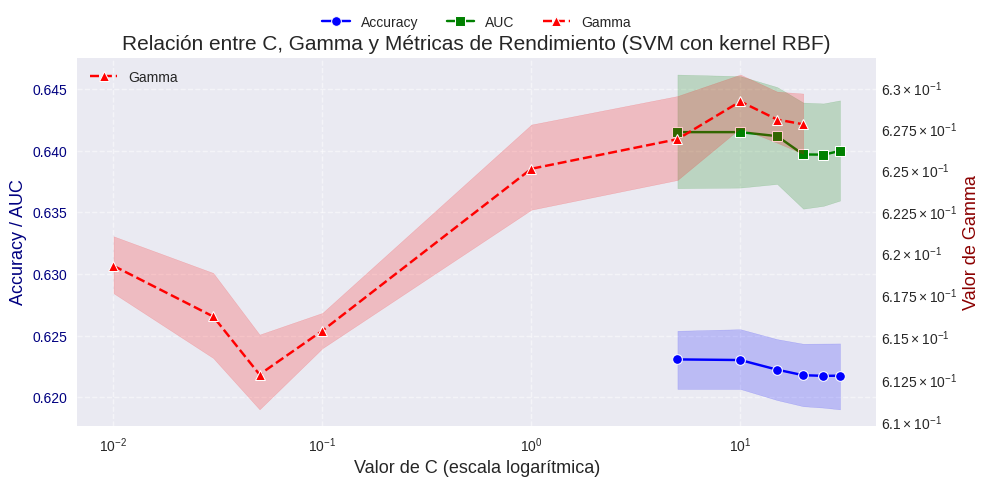

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Preparar los datos
results_df = pd.DataFrame(grid_search.cv_results_)
results_df['param_C'] = results_df['param_svm__C'].astype(float)
results_df['param_gamma'] = results_df['param_svm__gamma'].fillna(-1).astype(float)
results_df['kernel'] = results_df['param_svm__kernel']

# Filtrar solo RBF
rbf_results = results_df[results_df['kernel'] == 'rbf'].copy()

# Crear figura
fig, ax1 = plt.subplots(figsize=(10, 5))

# Eje X logarítmico
ax1.set_xscale('log')
ax1.set_xlabel('Valor de C (escala logarítmica)', fontsize=13)

# Eje Y izquierdo (Accuracy y AUC)
color1 = 'navy'
ax1.set_ylabel('Accuracy / AUC', color=color1, fontsize=13)
sns.lineplot(data=rbf_results, x='param_C', y='mean_test_accuracy',
             ax=ax1, label='Accuracy', marker='o', color='blue')
sns.lineplot(data=rbf_results, x='param_C', y='mean_test_roc_auc',
             ax=ax1, label='AUC', marker='s', color='green')
ax1.tick_params(axis='y', labelcolor=color1)

# Eje Y derecho (Gamma)
ax2 = ax1.twinx()
color2 = 'darkred'
ax2.set_ylabel('Valor de Gamma', color=color2, fontsize=13)
sns.lineplot(data=rbf_results, x='param_gamma', y='mean_test_accuracy',
             ax=ax2, label='Gamma', marker='^', color='red', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_yscale('log')  # Útil si gamma varía mucho

# Unificar leyendas
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)

# Mejoras visuales
plt.title('Relación entre C, Gamma y Métricas de Rendimiento (SVM con kernel RBF)', fontsize=15)
ax1.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


kernel lineal


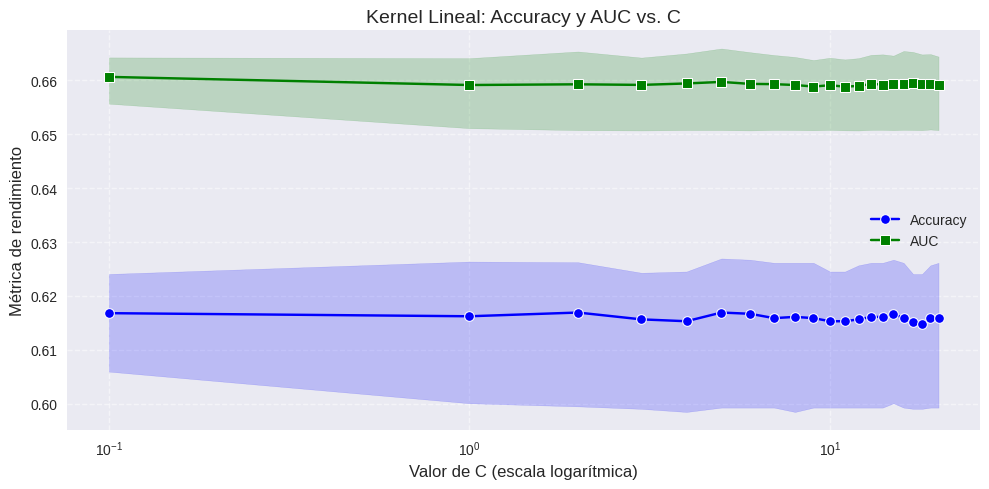

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo los resultados con kernel lineal
linear_results = results_df[results_df['kernel'] == 'linear'].copy()

# Crear figura
plt.figure(figsize=(10, 5))
plt.xscale('log')

# Graficar Accuracy y AUC
sns.lineplot(data=linear_results, x='param_C', y='mean_test_accuracy',
             label='Accuracy', marker='o', color='blue')
sns.lineplot(data=linear_results, x='param_C', y='mean_test_roc_auc',
             label='AUC', marker='s', color='green')

plt.xlabel('Valor de C (escala logarítmica)', fontsize=12)
plt.ylabel('Métrica de rendimiento', fontsize=12)
plt.title('Kernel Lineal: Accuracy y AUC vs. C', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
    print("\nMejor modelo encontrado:")
    print(f"Parámetros: {grid_search.best_params_}")


Mejor modelo encontrado:
Parámetros: {'feature_selection__k': 8, 'svm__C': 5, 'svm__kernel': 'linear'}


Grafico Roc y matriz de confusion

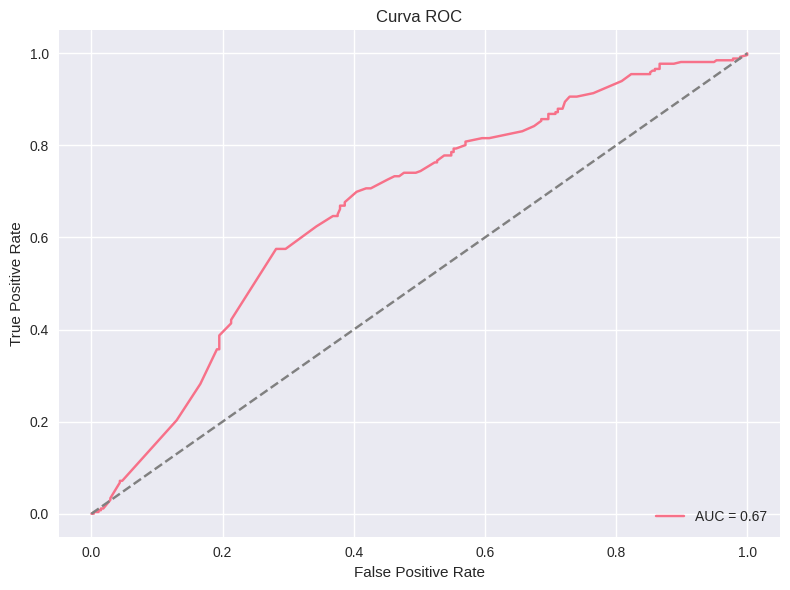

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener probabilidades de clase positiva
y_probs = best_model.predict_proba(X_test)[:, 1]

# Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Graficar
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

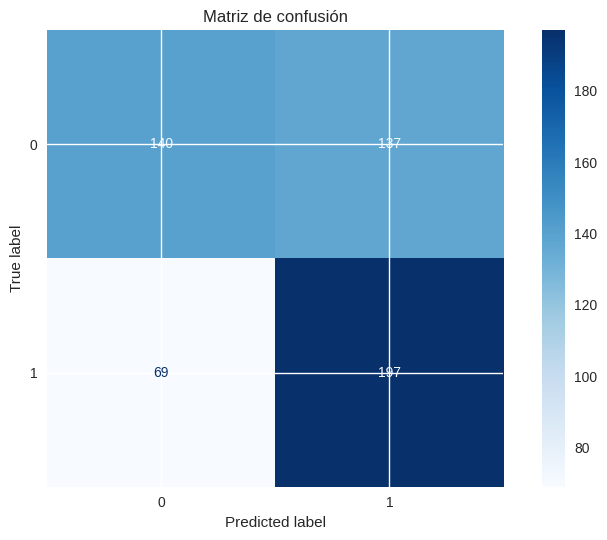

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predecir clases
y_pred = best_model.predict(X_test)

# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrarla
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Matriz de confusión')
plt.tight_layout()
plt.show()

Grafico de valores C en gridsearch[link text](https://)

<ipython-input-47-73d9e2b50a30>:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=long_df, x='C', y='accuracy', hue='k', palette='pastel', marker='o',ci=None)


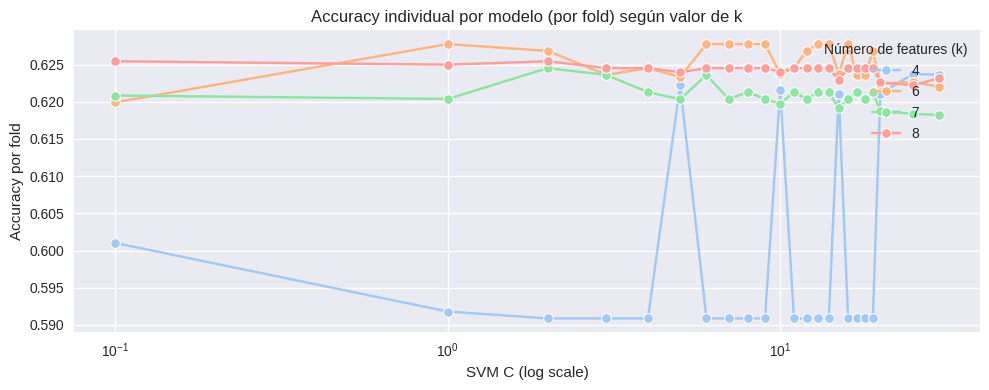

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurarse de tipos correctos
results_df['param_feature_selection__k'] = results_df['param_feature_selection__k'].astype(int)
results_df['param_svm__C'] = results_df['param_svm__C'].astype(float)

# Extraer columnas de accuracy por fold
accuracy_cols = [col for col in results_df.columns if 'split' in col and 'test_accuracy' in col]

# Reformatear el DataFrame a long format
long_df = pd.DataFrame()

for i, row in results_df.iterrows():
    for fold, col in enumerate(accuracy_cols):
        long_df = pd.concat([
            long_df,
            pd.DataFrame({
                'k': [row['param_feature_selection__k']],
                'C': [row['param_svm__C']],
                'fold': [fold],
                'accuracy': [row[col]]
            })
        ], ignore_index=True)

# Gráfico
plt.figure(figsize=(10, 4))
sns.lineplot(data=long_df, x='C', y='accuracy', hue='k', palette='pastel', marker='o',ci=None)

plt.xscale('log')
plt.xlabel('SVM C (log scale)')
plt.ylabel('Accuracy por fold')
plt.title('Accuracy individual por modelo (por fold) según valor de k')
plt.legend(title='Número de features (k)', loc='upper right')  # Modificación aquí
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-48-8d0efa287d9d>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=results_df, x='param_svm__C', y='mean_test_accuracy', hue='param_feature_selection__k', palette='pastel', marker='o', ci=None)


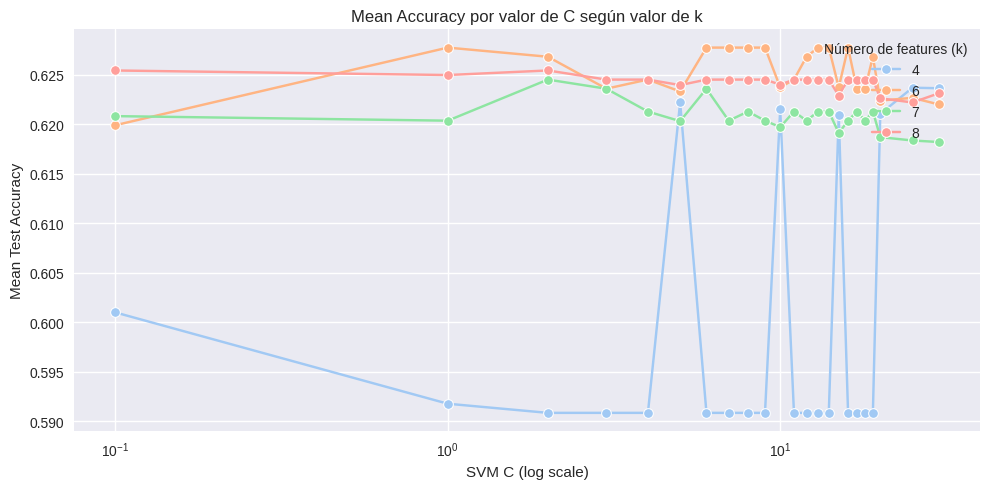

In [ ]:
# Asegurarse de tipos correctos
results_df['param_feature_selection__k'] = results_df['param_feature_selection__k'].astype(int)
results_df['param_svm__C'] = results_df['param_svm__C'].astype(float)

# Gráfico
plt.figure(figsize=(10, 5))
sns.lineplot(data=results_df, x='param_svm__C', y='mean_test_accuracy', hue='param_feature_selection__k', palette='pastel', marker='o', ci=None)

plt.xscale('log')
plt.xlabel('SVM C (log scale)')
plt.ylabel('Mean Test Accuracy')
plt.title('Mean Accuracy por valor de C según valor de k')
plt.legend(title='Número de features (k)', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

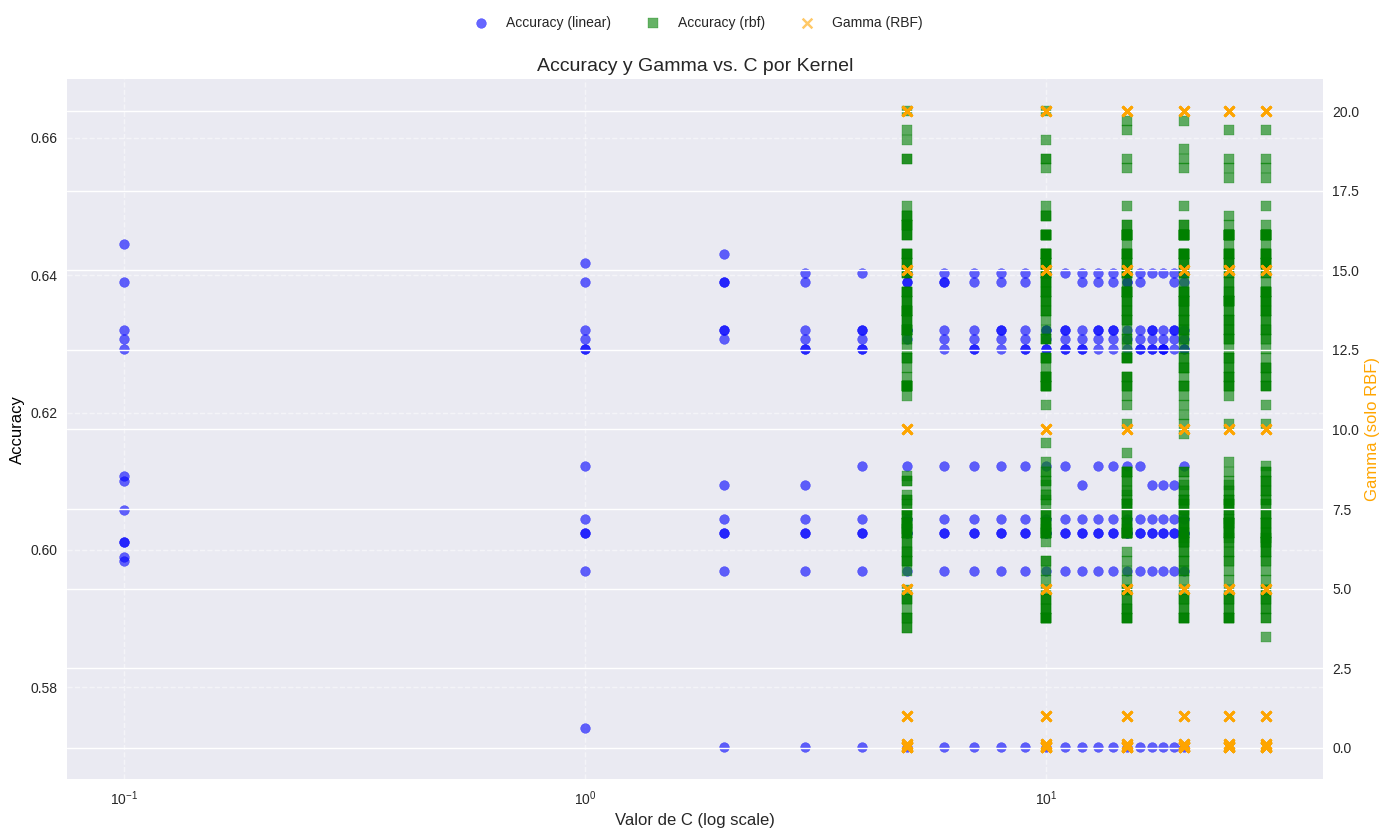

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurar tipos
results_df['param_svm__C'] = results_df['param_svm__C'].astype(float)
results_df['param_svm__gamma'] = results_df['param_svm__gamma'].astype(float)
results_df['param_svm__kernel'] = results_df['param_svm__kernel'].astype(str)

# Extraer columnas de accuracy por fold
accuracy_cols = [col for col in results_df.columns if 'split' in col and 'test_accuracy' in col]

# Reformatear a long format
long_df = pd.DataFrame()

for i, row in results_df.iterrows():
    for fold, col in enumerate(accuracy_cols):
        long_df = pd.concat([
            long_df,
            pd.DataFrame({
                'C': [row['param_svm__C']],
                'gamma': [row['param_svm__gamma']],
                'kernel': [row['param_svm__kernel']],
                'fold': [fold],
                'accuracy': [row[col]]
            })
        ], ignore_index=True)

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(14, 8))
ax2 = ax1.twinx()

# Configurar colores y marcadores
colors = {'linear': 'blue', 'rbf': 'green'}
markers = {'linear': 'o', 'rbf': 's'}

# Graficar accuracy (eje izquierdo)
for kernel in long_df['kernel'].unique():
    df_k = long_df[long_df['kernel'] == kernel]
    ax1.scatter(df_k['C'], df_k['accuracy'],
                label=f'Accuracy ({kernel})',
                color=colors[kernel], marker=markers[kernel], alpha=0.6)

# Graficar gamma (eje derecho), solo para RBF
df_rbf = long_df[long_df['kernel'] == 'rbf']
ax2.scatter(df_rbf['C'], df_rbf['gamma'],
            label='Gamma (RBF)', color='orange', marker='x', alpha=0.6)

# Escala logarítmica para C
ax1.set_xscale('log')

# Etiquetas y título
ax1.set_xlabel('Valor de C (log scale)', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12, color='black')
ax2.set_ylabel('Gamma (solo RBF)', fontsize=12, color='orange')
plt.title('Accuracy y Gamma vs. C por Kernel', fontsize=14)

# Leyendas
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)
ax1.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


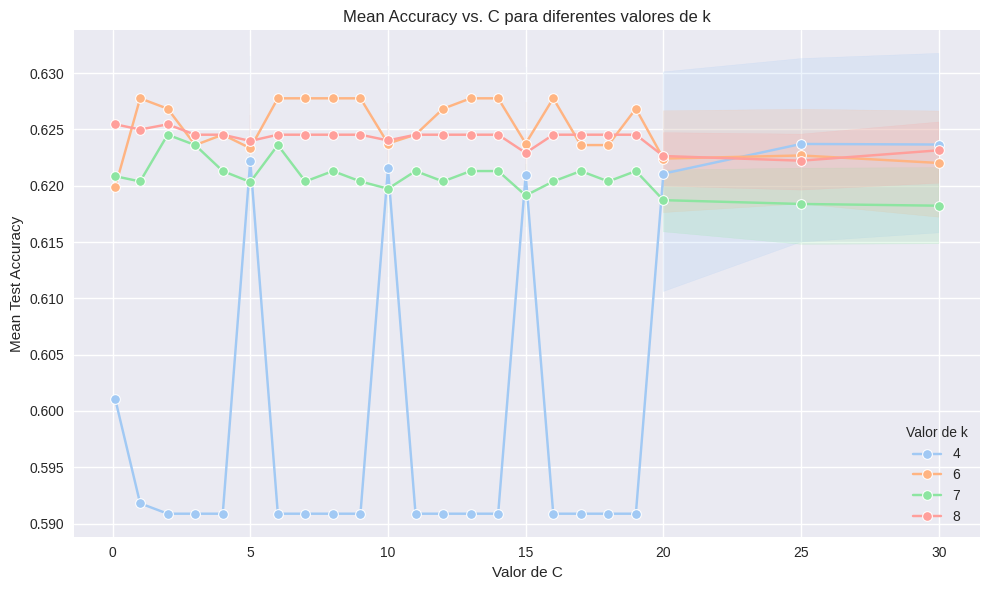

In [ ]:
# Asegurarse de tipos correctos
results_df['param_feature_selection__k'] = results_df['param_feature_selection__k'].astype(int)
results_df['param_svm__C'] = results_df['param_svm__C'].astype(float)

# Gráfico de mean_test_accuracy vs C, con color por k
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='param_svm__C', y='mean_test_accuracy', hue='param_feature_selection__k', marker='o', palette='pastel')

plt.xlabel('Valor de C')
plt.ylabel('Mean Test Accuracy')
plt.title('Mean Accuracy vs. C para diferentes valores de k')
plt.legend(title='Valor de k')
plt.grid(True)
plt.tight_layout()
plt.show()

## Entrenamiento, FIT

Entrenamos ahora el objeto grid_search utilizando los datos de entrenamiento X_train y y_train, evaluando múltiples combinaciones de hiperparámetros mediante validación cruzada.

Una vez finalizado el proceso, se extrae el mejor modelo encontrado (best_estimator_), que es el que obtuvo el mejor rendimiento según la métrica principal definida anteriormente (en este caso, roc_auc).

Luego, este modelo óptimo se utiliza para predecir las etiquetas (y_pred) y las probabilidades asociadas a la clase positiva (y_proba) en los datos de prueba X_test.

In [ ]:
rbf_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_feature_selection__k,param_svm__C,param_svm__kernel,param_svm__gamma,params,split0_test_accuracy,...,rank_test_accuracy,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,param_C,param_gamma,kernel
84,0.474698,0.029906,0.142207,0.016531,4,5.0,rbf,0.01,"{'feature_selection__k': 4, 'svm__C': 5, 'svm_...",0.623790,...,231,0.656761,0.661833,0.640706,0.653100,0.009005,101,5.0,0.01,rbf
85,0.469916,0.026714,0.129045,0.027478,4,5.0,rbf,0.03,"{'feature_selection__k': 4, 'svm__C': 5, 'svm_...",0.632089,...,259,0.661660,0.655823,0.638849,0.652110,0.009676,110,5.0,0.03,rbf
86,0.461023,0.017553,0.134766,0.019281,4,5.0,rbf,0.05,"{'feature_selection__k': 4, 'svm__C': 5, 'svm_...",0.637621,...,271,0.660075,0.654552,0.630972,0.648533,0.012621,138,5.0,0.05,rbf
87,0.447856,0.035329,0.094460,0.018108,4,5.0,rbf,0.10,"{'feature_selection__k': 4, 'svm__C': 5, 'svm_...",0.634855,...,229,0.658223,0.659191,0.634703,0.650706,0.011323,120,5.0,0.10,rbf
88,0.375126,0.011618,0.077904,0.001437,4,5.0,rbf,1.00,"{'feature_selection__k': 4, 'svm__C': 5, 'svm_...",0.656985,...,5,0.647084,0.648296,0.612608,0.635996,0.016545,213,5.0,1.00,rbf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.368787,0.017481,0.079399,0.001537,8,30.0,rbf,1.00,"{'feature_selection__k': 8, 'svm__C': 30, 'svm...",0.641770,...,140,0.624562,0.617414,0.603031,0.615002,0.008954,298,30.0,1.00,rbf
296,0.293656,0.003610,0.081851,0.002284,8,30.0,rbf,5.00,"{'feature_selection__k': 8, 'svm__C': 30, 'svm...",0.643154,...,129,0.650154,0.637696,0.595123,0.627658,0.023561,253,30.0,5.00,rbf
297,0.288063,0.001627,0.079775,0.001006,8,30.0,rbf,10.00,"{'feature_selection__k': 8, 'svm__C': 30, 'svm...",0.645920,...,77,0.655643,0.623004,0.613844,0.630830,0.017939,239,30.0,10.00,rbf
298,0.302830,0.006057,0.081618,0.002370,8,30.0,rbf,15.00,"{'feature_selection__k': 8, 'svm__C': 30, 'svm...",0.645920,...,86,0.670288,0.644441,0.610301,0.641677,0.024567,193,30.0,15.00,rbf


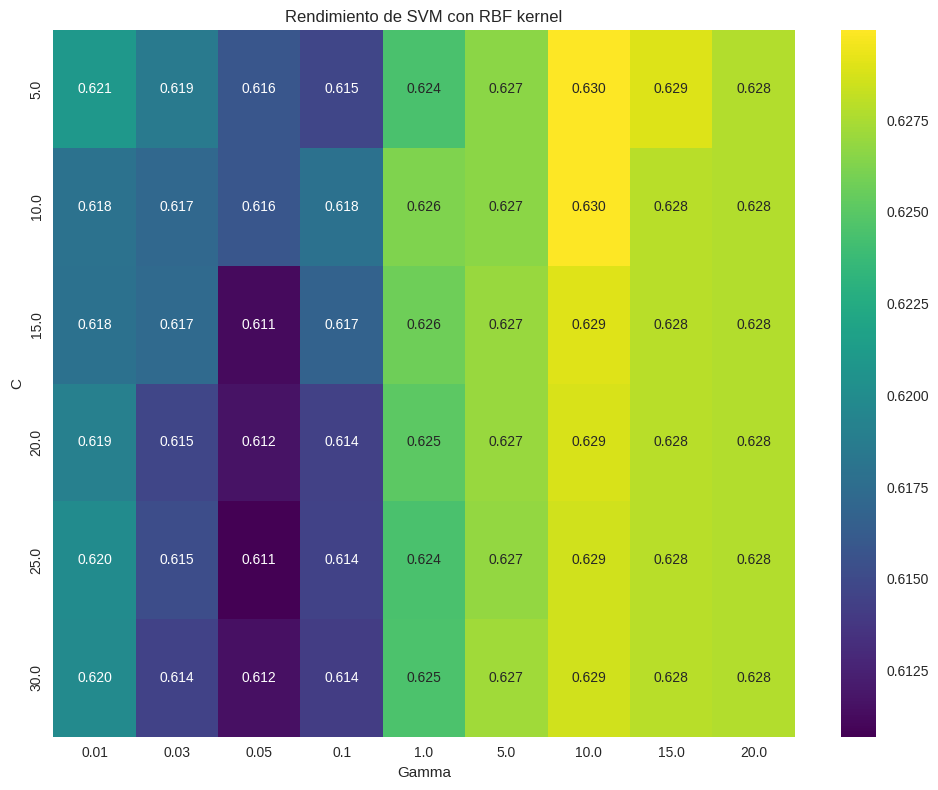

In [ ]:
#import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Filtrar resultados para kernel 'rbf' y crear una copia segura
rbf_results = results_df[results_df['param_svm__kernel'] == 'rbf'].copy()

# 2. Convertir C y gamma a float (usando .copy() evitamos el warning)
rbf_results['param_svm__C'] = pd.to_numeric(rbf_results['param_svm__C'], errors='coerce')
rbf_results['param_svm__gamma'] = pd.to_numeric(rbf_results['param_svm__gamma'], errors='coerce')

# 3. Filtrar valores válidos (positivos y no nulos)
rbf_results = rbf_results[
    (rbf_results['param_svm__C'] > 0) &
    (rbf_results['param_svm__gamma'] > 0)
].dropna(subset=['param_svm__C', 'param_svm__gamma'])

# 4. Crear la tabla pivote
pivot_table = rbf_results.pivot_table(
    values='mean_test_accuracy',
    index='param_svm__C',
    columns='param_svm__gamma'
)

# 5. Plot simple sin logscale
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap='viridis')
plt.title('Rendimiento de SVM con RBF kernel')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.tight_layout()
plt.show()


## Ahora Realizamos un Bagging

creamos un wrapper para el bestmodel

 Justificación del uso de Bagging

El Bagging (Bootstrap Aggregating) reduce la varianza del modelo original, en este caso SVM, al entrenar múltiples versiones sobre subconjuntos distintos de los datos.

Especialmente útil en modelos con alto variance como SVM con kernel rbf.

Resultado esperado: una ligera mejora (o al menos estabilización) en la performance general (accuracy y AUC), haciéndolo más robusto a ruido.

In [ ]:
## 4. Extracción del Mejor Modelo para Bagging --------------------------------

# Solución al problema: Extraer solo el estimador final del pipeline
best_svm = grid_search.best_estimator_.named_steps['svm']

# Configurar Bagging con el mejor SVM
bagging_model = BaggingClassifier(
    estimator=SVC(
        C=grid_search.best_params_['svm__C'],
        kernel=grid_search.best_params_['svm__kernel'],
        class_weight='balanced',
        probability=True,
        random_state=42
    ),
    n_estimators=150,
    max_samples=0.8,
    max_features=0.8,
    random_state=42,
    n_jobs=-1
)

# Pipeline completo con Bagging
final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(
        score_func=f_classif,
        k=grid_search.best_params_['feature_selection__k']
    )),
    ('bagging', bagging_model)
])

# Entrenamiento final
final_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('mileage',
                                                  Pipeline(steps=[('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Mileage']),
                                                 ('levy',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Levy']),
                                                 ('other_num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler(...
                                                  Index(['Manufacturer', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels'],
      dtype='object'))])),
                ('feature_selection', SelectKBest(k=8)),
                ('bagging',
                 BaggingClassifier(estimator=SVC(C=5, class_weight='balanced',
                                                 kernel='linear',
                                                 probability=True,
                                                 random_state=42),
                                   max_features=0.8, max_samples=0.8,
                                   n_estimators=150, n_jobs=-1,
                                   random_state=42))])

Evaluacion del bagging

In [ ]:
## 5. Evaluación --------------------------------

# Predicciones
y_pred = final_pipeline.predict(X_test)
y_proba = final_pipeline.predict_proba(X_test)[:, 1] #probabilidades para calculo de roc auc

# Métricas
print("\nEvaluación del Modelo Bagging:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.4f}")

# Comparación con el modelo base sin bagging
base_pred = grid_search.best_estimator_.predict(X_test)
base_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
print("\nComparación con modelo base:")
print(f"Accuracy (base): {accuracy_score(y_test, base_pred):.4f}")
print(f"AUC-ROC (base): {roc_auc_score(y_test, base_proba):.4f}")

NameError: name 'final_pipeline' is not defined

El proceso de ensamble mediante la técnica de Bagging se aplicó con el objetivo de mejorar el rendimiento del modelo base previamente obtenido. Tras la evaluación del modelo Bagging en el conjunto de prueba, se observaron cambios en las métricas de rendimiento en comparación con el modelo individual. En particular, la precisión del modelo ensamblado alcanzó un valor de 0.6335, lo que representa un ligero incremento con respecto a la precisión del modelo base, que se situó en 0.6206. Este aumento, aunque modesto en magnitud, sugiere que la agregación de las predicciones de múltiples modelos base entrenados en subconjuntos aleatorios del conjunto de entrenamiento ha contribuido a una reducción de los errores de clasificación en los datos no vistos.

De manera similar, el análisis del Área bajo la Curva ROC (AUC-ROC) reveló una tendencia positiva tras la aplicación de Bagging. El valor del AUC-ROC para el modelo ensamblado fue de 0.6780, superando el valor de 0.6652 obtenido por el modelo base. Esta mejora indica una mayor capacidad del modelo Bagging para distinguir entre las clases positiva y negativa, lo que se traduce en una mejor habilidad para la discriminación en el contexto del problema de clasificación binaria abordado. La consistencia de la mejora tanto en la precisión como en el AUC-ROC sugiere que el Bagging ha logrado su objetivo de estabilizar las predicciones y mejorar la generalización del modelo al reducir la varianza inherente al modelo base.

Si bien el aumento en la precisión y el AUC-ROC no es sustancial, sí señala un beneficio en términos de la capacidad del modelo para generalizar a nuevos datos. Por lo que podemos decir que la implementación del Bagging sobre el modelo base resultó en una mejora minimma pero consistente en las métricas de evaluación.

La decisión de adoptar esta técnica de ensamble en la implementación final debe tener en cuenta el equilibrio entre la mejora obtenida en el rendimiento y el incremento en el costo computacional asociado al entrenamiento de múltiples modelos base. En nuestro caso se ve justificado, ya que no requiere un costo computacional muy alto y otorga cierte mejora aunque sea muy reducida.

## Analisis de distribucion de la variable objetivo (Color)

Creamos una funcion para la evaluacion de las metricas en los modelos



              precision    recall  f1-score   support

       False       0.67      0.51      0.58       277
        True       0.59      0.74      0.66       266

    accuracy                           0.62       543
   macro avg       0.63      0.62      0.62       543
weighted avg       0.63      0.62      0.62       543

Confusion Matrix:


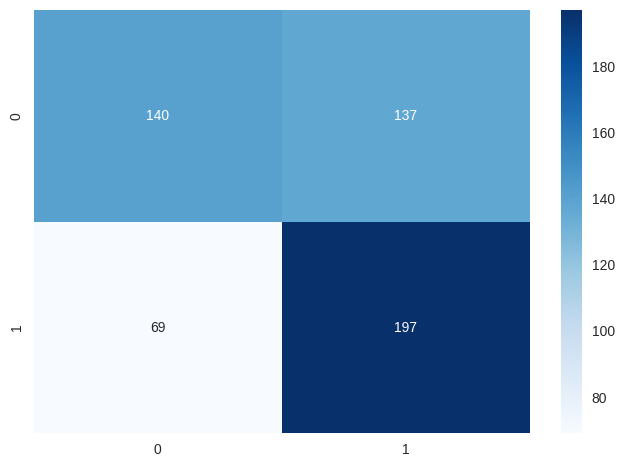

Accuracy: 0.6206
ROC AUC: 0.6652


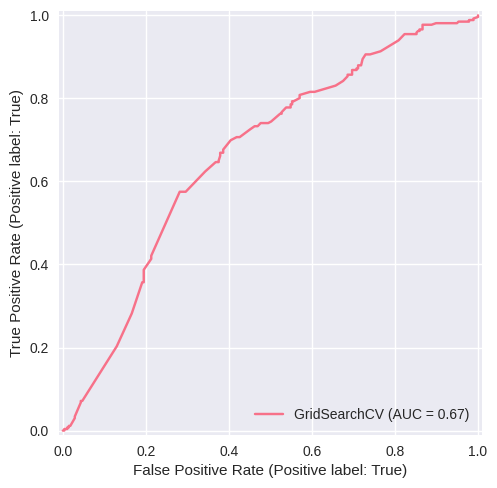

In [ ]:
# Enhanced evaluation function
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    probas = model.predict_proba(X_test)[:, 1]

    print(classification_report(y_test, predictions))
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.show()

    print(f"Accuracy: {accuracy_score(y_test, predictions):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, probas):.4f}")

    # Plot ROC curve
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.show()

evaluate_model(grid_search, X_test, y_test)

In [ ]:
grid_search.best_params_

{'feature_selection__k': 8, 'svm__C': 5, 'svm__kernel': 'linear'}

              precision    recall  f1-score   support

       False       0.67      0.59      0.63       277
        True       0.62      0.70      0.65       266

    accuracy                           0.64       543
   macro avg       0.64      0.64      0.64       543
weighted avg       0.64      0.64      0.64       543

Confusion Matrix:


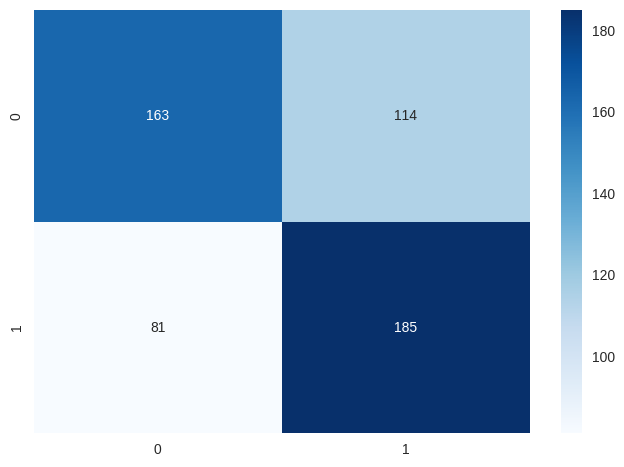

Accuracy: 0.6409
ROC AUC: 0.6756


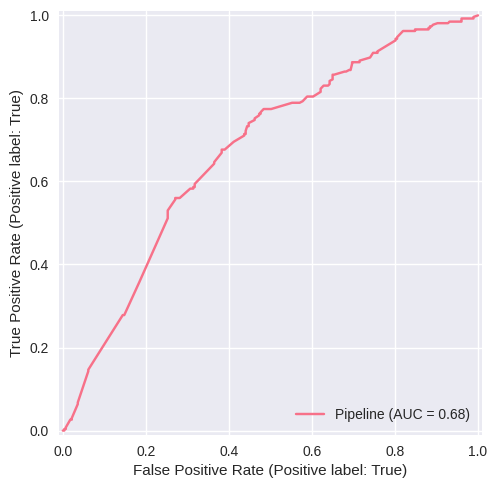

In [ ]:
evaluate_model(final_pipeline, X_test, y_test)

evaluamos el modelo con la funcion de evaluacion

# Codigo para implementar *Stacking*

# Punto 3: Stacking en profundidad.

El stacking es una técnica de ensamblaje que combina las predicciones de múltiples modelos base (también llamados clasificadores de primer nivel o base learners) para formar un nuevo conjunto de predicciones. Estas nuevas predicciones se utilizan como entrada para un meta-clasificador (también llamado clasificador de segundo nivel o final estimator), que aprende a ponderar las predicciones de los modelos base para hacer la predicción final [Ver "11_stacking_AUTOMATICO.pdf", "12_stacking_MANUAL.pdf", "14_stacking_CV_v4.pdf"].
A continuación, se describen los pasos para realizar un modelo de stacking en profundidad, comparando los clasificadores base y el resultado final:
Pasos a seguir:
Dividir los datos: Es fundamental dividir los datos en conjuntos de entrenamiento y prueba. Para un stacking más "en profundidad", a menudo se utiliza un conjunto de validación adicional para entrenar el meta-clasificador, aunque los documentos también muestran el uso de validación cruzada (cv) dentro de StackingClassifier. El documento "12_stacking_MANUAL.pdf" explícitamente menciona la división en entrenamiento, validación y prueba.


Seleccionar los clasificadores base: Elige varios modelos de clasificación diferentes para que actúen como tus clasificadores base. Es recomendable utilizar modelos diversos para que capturen diferentes aspectos de los datos. Los documentos ejemplifican el uso de RandomForestClassifier, LogisticRegression, y KNeighborsClassifier como modelos base. El documento "12_stacking_MANUAL.pdf" utiliza LinearRegression, xgb.XGBRegressor, y RandomForestRegressor (aunque en un contexto de regresión, el principio es similar).


Entrenar los clasificadores base: Entrena cada uno de los clasificadores base utilizando el conjunto de entrenamiento. En el enfoque manual ("12_stacking_MANUAL.pdf"), los modelos iniciales se entrenan en una parte de los datos.


Obtener las predicciones de los clasificadores base:


Para el meta-clasificador (conjunto de validación o cross-validation): Cada clasificador base entrenado se utiliza para hacer predicciones sobre el conjunto de validación (si se utiliza una división explícita) o mediante validación cruzada en el conjunto de entrenamiento (cross_val_predict). Estas predicciones forman las características metaaprendidas. Cada fila de estas nuevas características meta representa una instancia del conjunto de validación/entrenamiento, y cada columna representa la predicción de un clasificador base para esa instancia.
Para el conjunto de prueba: Una vez entrenado el meta-clasificador, los clasificadores base también se utilizan para hacer predicciones sobre el conjunto de prueba. Estas predicciones se transforman utilizando el meta-clasificador entrenado para obtener la predicción final del modelo de stacking.
Entrenar el meta-clasificador: El meta-clasificador se entrena utilizando las características metaaprendidas (las predicciones de los clasificadores base) como variables de entrada y las etiquetas verdaderas del conjunto de validación (o las etiquetas correspondientes a las predicciones por validación cruzada en el entrenamiento) como la variable objetivo. En los ejemplos, se utiliza LogisticRegression como meta-clasificador, pero también se puede usar RandomForestClassifier o SVC.


Evaluar el rendimiento: Evalúa el rendimiento de cada clasificador base individualmente en el conjunto de prueba. Luego, evalúa el rendimiento del modelo de stacking completo en el conjunto de prueba, utilizando las métricas de clasificación apropiadas (accuracy, precision, recall, F1-score, classification report, matriz de confusión).


Comparar los resultados: Compara las métricas de rendimiento de los clasificadores base individuales con las del modelo de stacking. Analiza si el stacking ha mejorado el rendimiento general. También puedes comparar el rendimiento de diferentes opciones para el meta-clasificador.


Implementación con StackingClassifier (automático):

En primer lugar asigno los algoritmos a los modelos base que seran utilizados para el stacking,


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Asegurate de tener definido tu `preprocessor` (ColumnTransformer)
# Y tener `grid_search.best_params_` disponible para los hiperparámetros del SVM

# Modelos base con preprocesamiento incluido
base_models = [
    ('svm', make_pipeline(
        preprocessor,
        SVC(
            C=grid_search.best_params_['svm__C'],
            kernel=grid_search.best_params_['svm__kernel'],
            probability=True,
            random_state=42
        )
    )),
    ('rf', make_pipeline(
        preprocessor,
        RandomForestClassifier(
            n_estimators=100,
            max_depth=5,
            random_state=42
        )
    )),
    ('gb', make_pipeline(
        preprocessor,
        GradientBoostingClassifier(
            n_estimators=50,
            learning_rate=0.1,
            random_state=42
        )
    )),
    ('gp', make_pipeline(
        preprocessor,
        GaussianProcessClassifier(
            kernel=1.0 * RBF(length_scale=1.0),
            random_state=42,
            n_jobs=-1
        )
    ))
]

base_models_names = [name for name, _ in base_models]
base_models_names


['svm', 'rf', 'gb', 'gp']

## Creacion del metamodelo

In [ ]:
# Meta-modelo
meta_model = LogisticRegression(max_iter=1000, random_state=42)

# Clasificador con Stacking
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    stack_method='predict_proba',
    passthrough=False,
    cv=5,
    n_jobs=-1
)


## Fit del stacking y evaluacion

In [ ]:
stacking_model.fit(X_train, y_train)



Resultados del modelo con Stacking:
              precision    recall  f1-score   support

       False       0.68      0.66      0.67       277
        True       0.66      0.68      0.67       266

    accuracy                           0.67       543
   macro avg       0.67      0.67      0.67       543
weighted avg       0.67      0.67      0.67       543

Precisión: 0.6685082872928176
AUC: 0.7205287587199045


              precision    recall  f1-score   support

       False       0.68      0.66      0.67       277
        True       0.66      0.68      0.67       266

    accuracy                           0.67       543
   macro avg       0.67      0.67      0.67       543
weighted avg       0.67      0.67      0.67       543

Confusion Matrix:


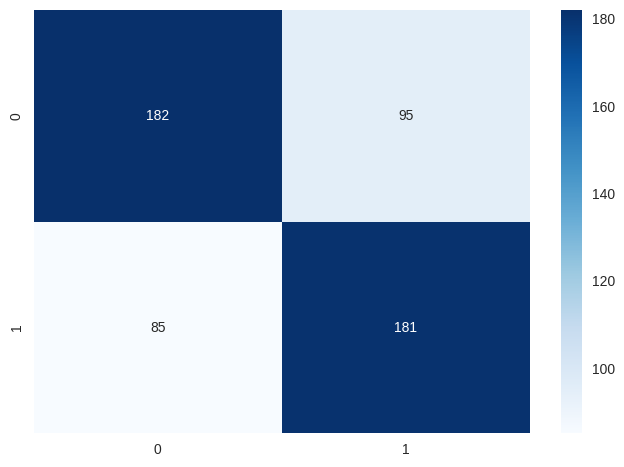

Accuracy: 0.6685
ROC AUC: 0.7205


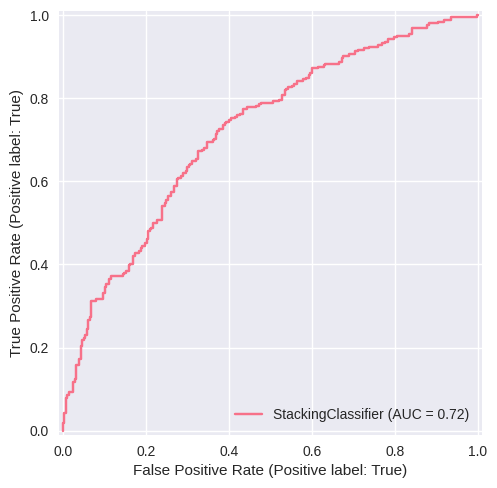

In [ ]:
evaluate_model(stacking_model, X_test, y_test)

# Punto 4: Realizar un proceso comparativo sobre los modelos obtenidos.

Tendremos en cuenta diversos puntos para la comparacion de los modelos. En primer lugar evaluaremos los rendimientos entre modelos obtenidos, luego nos enfocaremos en la complejidad, la interpretabilidad y el costo computacional para establecer una comparacion global e identificar los mejores candidatos para modelos de produccion.


### Rendimiento del Modelo:


---

### Comparación de Modelos: SVM Base, Bagging y Stacking

En esta evaluación se compararon tres enfoques de modelado para clasificación: un modelo base SVM con selección de características optimizada, una versión mejorada mediante **Bagging**, y un enfoque **Stacking** que combina múltiples clasificadores. Se consideraron tanto el rendimiento predictivo como la complejidad y el costo computacional de cada estrategia.

---

#### 1. Modelo SVM Base

El modelo base fue optimizado usando `GridSearchCV` con un amplio rango de hiperparámetros para `C`, `gamma` (en el caso de kernel RBF), y el número de características seleccionadas (`k`). El mejor modelo final resultó ser un **SVM con kernel lineal** (`C=5`, `k=8`), lo cual ofrece una estructura más interpretable y computacionalmente eficiente en comparación con kernels no lineales.

* **Precisión (Accuracy):** 62,06%
* **ROC AUC:** 0,6652
* **Ventajas:** Simple, rápido de entrenar, fácil de interpretar.
* **Limitaciones:** Rendimiento relativamente bajo y no captura relaciones no lineales complejas.

---

#### 2. Modelo Mejorado con Bagging

Se aplicó **Bagging (Bootstrap Aggregating)** sobre el mejor modelo SVM encontrado. Se iteró en varias oportunidades con diferentes valores de estimadores y se determinó que el mejor resultado se obtenía con 150 estimadores. Se establecieron parámetros para muestreo parcial tanto en muestras como en características (`max_samples=0.8`, `max_features=0.8`). Esto mejora la **robustez del modelo** al reducir la varianza y mitigar el sobreajuste.

Los mejores resultados obtenidos con el bagging fuerom:

* **Precisión (Accuracy):** 64,09%
* **ROC AUC:** 0,6756
* **Ventajas:** Mejora sobre el SVM base sin cambiar el modelo subyacente. Buena generalización.
* **Limitaciones:** Aumenta mas el costo computacional debido a múltiples entrenamientos del mismo modelo, sin embargo la selección del mejor modelo base lineal agiliza el proecesamiento.

---

#### 3. Modelo con Stacking

El enfoque con mejores resultados fue el **Stacking**, Para ello se combinaron cuatro modelos base: SVM, Random Forest, Gradient Boosting y Gaussian Process Clasifier.
Estos modelos capturan distintos tipos de relaciones (lineales, no lineales, interacciones complejas) y se han integrados mediante una regresión logística como meta-modelo.En este caso se obtuvo una mejora sustancial comparando con nuestro primer modelo base svm.

Resultados:

* **Precisión (Accuracy):** 66,85%
* **ROC AUC:** 0,7205
* **A favor:** Se obtuvo un mejor rendimiento global. Se capturan una variedad de patrones al combinar modelos con diferentes sesgos.
* **Puntos en contra:** Es cierto que es un modelo con mayor complejidad, lo que conlleva a una menor interpretabilidad y ademàs para el entrenamiento se requiere de un mayor costo computacional, especialmente por el uso de `GaussianProcessClassifier`, que escala mal volúmenes de datos grandes.

---

### Conclusión


Despues de realizar el procesamiento completo, modificando las grillas de parámetros, agregando y quitando procesos en los pipelines tanto de preprocesamiento e iterando decenas de veces sobre los modelos tratando de obtener buenas métricas he concluido que el **SVM base** es adecuado como un punto de partida, ya que establecer el modelo es rápido y sencillo, pero tiene una limitada capacidad predictiva, al menos en nuestro problema, ya que no contaba con variables con una alta capacidad predictiva.
La utilización de la técnica de **Bagging** mejoró los resultados sin modificar la estructura del modelo base, siendo una buena herramienta intermedia ya que no aumentaba la complejidad del modelo, y el costo computacional de usar un kernel lineal no era tan elevado.
Por último, en nuestro caso la implementación del **Stacking** nos ofreciò el mejor rendimiento en términos de detección de verdaderos positivos con el Accuracy y también del AUC, destacándose como la opción más robusta, que si bien es cierto implica un paso mas y un nuevo procesamiento de datos se ve beneficiado por una mejora porcentual bastante importante.

Como conclusión final veo la importancia de entender las necesidades del cliente y que pregunta buscar responder, teniendo en cuenta que si lo que se busca es el mejor rendimeinto sin importar los costos computacionales asociados o la pérdida de interpretabilidad en este caso la elección del stacking sería la justificada, sin embargo si se prefiere algo más simple e interpretable iría por el modelo de bagging, que mantiene las características del modelo base y presenta mejores rendimientos.

---



### Complejidad del Modelo:


**Número de Estimadores:** El bagging implica entrenar múltiples instancias del mismo modelo base (el SVM). El stacking involucra entrenar múltiples modelos base diferentes, además de un meta-clasificador. En general, el stacking tiende a tener mayor complejidad en términos del número de modelos entrenados.

**Hiperparámetros:** El SVM requiere una cuidadosa selección y ajuste de hiperparámetros para cada kernel. El stacking también tiene hiperparámetros que pueden ajustarse (por ejemplo, la elección de los modelos base, el meta-clasificador y los parámetros de validación cruzada), aunque el enfoque principal suele ser la diversidad de los modelos base.

### Interpretabilidad:


**SVM:** Un SVM con kernel lineal puede ofrecer cierta interpretabilidad a través de los coeficientes de los vectores de soporte. Sin embargo, con kernels no lineales (como RBF o polinomial), la interpretabilidad se reduce significativamente. El bagging de un SVM disminuye aún más la interpretabilidad al combinar las predicciones de múltiples modelos.

**Stacking:** El stacking generalmente se considera un modelo de "caja negra" con baja interpretabilidad, especialmente cuando se utilizan múltiples modelos base diversos y un meta-clasificador complejo. Es difícil discernir la importancia relativa de las características originales en la predicción final.

A pesar de que se hayan utilizado algoritmos como árboles de decisión que son transparentes por sí solos, en el contexto de un ensamble de stacking, actúan como "sub-modelos" cuyas predicciones son luego combinadas por otro modelo. Esta capa de indirección y combinación hace que el modelo final de stacking se comporte como una "caja negra" con baja interpretabilidad en términos de la influencia directa de las características originales en la predicción final.

Es más fácil entender la importancia de las predicciones de los modelos base para el meta-clasificador, pero rastrear la importancia de una característica original a través de todo el proceso de stacking es considerablemente más difícil.

### Costo Computacional:


**Tiempo de Entrenamiento:** El ajuste paramétrico del SVM, especialmente con GridSearchCV explorando múltiples kernels y rangos de parámetros, puede ser computacionalmente intensivo. El bagging también incrementa el costo al entrenar múltiples modelos SVM. El stacking requiere entrenar varios modelos base y un meta-clasificador, lo que también puede ser costoso, especialmente si los modelos base son complejos o si se utiliza una validación cruzada exhaustiva.

**Recursos:** Considerar la memoria y el tiempo de procesamiento necesarios para entrenar y hacer predicciones con cada modelo. Los modelos con mayor complejidad tienden a requerir más recursos.